# The KPMG Bicycle Problem
A classic example of customer segmentaion analysis.
> This is a part of the KPMG Job Simulation Program, it used to be availible [the forage](https://www.theforage.com/) but is archived now.

> This notebook is a summary and updated version of the past three notebooks I've created before which can be visited here:
> - [Task 1](https://www.kaggle.com/code/notcostheta/kpmg-virtual-internship-task1)
> - [Task 2](https://www.kaggle.com/code/notcostheta/kpmg-virtual-internship-task2)
> - [Task 3](https://www.kaggle.com/code/notcostheta/kpmg-virtual-internship-task3)

## Background :

Apparently I’m finally working at KPMG (please hire me) and I just got my first client, it’s a medium-sized bikes and cycling accessories company, Sprocket Central Pty Ltd.

Me along with my Analytics, Information and modelling team are supposed to help them skyrocket their business 📈👌

They provided me with three datasets:

- Customer Demographic
- Customer Addresses
- Transactions data in the past 3 months

But there are issues with their data, of course, it can not be used to build some magical model right away, also my Associate Director suggested that I should optimise the quality of the customer data before deriving any kind of insights for the company growth. 

Which brings us towards our first task !

# Task 1 : Data Quality Assessment
Fix the issues we encounter in all three datasets, and draft an email to the client identifying the data quality issues and ways to mitigate them.

At the end of this task, we would have it cleaned, made it accurate and consistent, and ready to be used for our analysis.


### Data Quality Framework

| Framework   | Description                                                                                      |
|-------------|--------------------------------------------------------------------------------------------------|
| Accuracy    | The closeness between a value to its correct representation of the real-life phenomenon          |
| Completeness| The extent to which data are of sufficient breadth, depth, and scope for the task at hand        |
| Consistency | The extent to which data are uniform in format, use, and meaning across a data collection        |
| Currency    | The freshness of data                                                                           |
| Volatility  | The length of time the data remains valid                                                       |
| Relevancy   | The extent to which data are appropriate for the task at hand                                   |
| Validity    | The extent to which data conform to defined business rules or constraints                       |
| Uniqueness  | The extent to which data are unique within the dataset                                          |


## Importing the data
We will be using pandas libraries to import the data and perform our analysis.
You can also use excel or google sheets and whatever tools you're comfortable with.


In [358]:
# Importing the libraries
import numpy as np
import pandas as pd

# Importing the dataset
xls = pd.ExcelFile(
    "/home/meow/Desktop/internship-speedrun/kpmg/KPMG_VI_New_raw_data_update_final.xlsx"
)

# I'm using black formatting for the code
# Keep note of the naming convention
# We used PascalCase to name all out original datasets

Transactions = pd.read_excel(xls, "Transactions", skiprows=1)
CustomerDemographic = pd.read_excel(xls, "CustomerDemographic", skiprows=1)
CustomerAddress = pd.read_excel(xls, "CustomerAddress", skiprows=1)
NewCustomerList = pd.read_excel(xls, "NewCustomerList", skiprows=1)

## Analyzing the dataframes
We will analyze the dataframes and see what issues we can find in them.
- Shape and Cardinality
- Missing Values
- Duplicates
- Data Types

Solutions and mitigation strategies are available at the end of each section.

### Analysing Transactions Data

#### Shape and Cardinality
- Shape of the data is 20000 rows and 13 columns
- Columns with cardinality 2 should be converted to boolean
- This would be useful for non machine learning approaches

In [359]:
Transactions.head()

transaction_id  product_id  customer_id transaction_date  online_order  \
0               1           2         2950       2017-02-25           0.0   
1               2           3         3120       2017-05-21           1.0   
2               3          37          402       2017-10-16           0.0   
3               4          88         3135       2017-08-31           0.0   
4               5          78          787       2017-10-01           1.0   

  order_status           brand product_line product_class product_size  \
0     Approved           Solex     Standard        medium       medium   
1     Approved   Trek Bicycles     Standard        medium        large   
2     Approved      OHM Cycles     Standard           low       medium   
3     Approved  Norco Bicycles     Standard        medium       medium   
4     Approved  Giant Bicycles     Standard        medium        large   

   list_price  standard_cost  product_first_sold_date  
0       71.49          53.62                  41245.0  
1     2091.47         388.92                  41701.0  
2     1793.43         248.82                  36361.0  
3     1198.46         381.10                  36145.0  
4     1765.30         709.48                  42226.0

In [360]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [361]:
# List unique values of all the columns with ascending order of cardinality
# Cardinality is the number of unique values in a column
# This is a good way to check for categorical columns

for col in Transactions.columns:
    print(f"{col}: {Transactions[col].nunique()}")

print("------------------------------------")

# Print top 7 unique values of all the columns with ascending order of cardinality if less than 7
for col in Transactions.columns:
    if Transactions[col].nunique() < 10:
        print(f"{col}: {Transactions[col].unique()}")

transaction_id: 20000
product_id: 101
customer_id: 3494
transaction_date: 364
online_order: 2
order_status: 2
brand: 6
product_line: 4
product_class: 3
product_size: 3
list_price: 296
standard_cost: 103
product_first_sold_date: 100
------------------------------------
online_order: [ 0.  1. nan]
order_status: ['Approved' 'Cancelled']
brand: ['Solex' 'Trek Bicycles' 'OHM Cycles' 'Norco Bicycles' 'Giant Bicycles'
 'WeareA2B' nan]
product_line: ['Standard' 'Road' 'Mountain' 'Touring' nan]
product_class: ['medium' 'low' 'high' nan]
product_size: ['medium' 'large' 'small' nan]


#### Missing Values and Duplicate Rows
- The number of missing values in this dataframe are insignificant and from the same rows, we can drop them.
- There are no duplicate rows

In [362]:
# Function to analyse the missing data


def analyze_null_values(dataframe):
    total_null_values = dataframe.isnull().sum()
    total_values = dataframe.count().sort_values(ascending=True)
    null_values_percentage = (total_null_values / total_values) * 100
    missing_data = pd.concat(
        {
            "Null Values": total_null_values,
            "Percentage of Missing Values": null_values_percentage,
            "Total Values": total_values,
        },
        axis=1,
    )

    missing_data = missing_data.sort_values(
        by="Percentage of Missing Values", ascending=False
    )

    return missing_data


analyze_null_values(Transactions)

Null Values  Percentage of Missing Values  \
online_order                     360                      1.832994   
brand                            197                      0.994799   
product_line                     197                      0.994799   
product_class                    197                      0.994799   
product_size                     197                      0.994799   
standard_cost                    197                      0.994799   
product_first_sold_date          197                      0.994799   
transaction_id                     0                      0.000000   
product_id                         0                      0.000000   
customer_id                        0                      0.000000   
transaction_date                   0                      0.000000   
order_status                       0                      0.000000   
list_price                         0                      0.000000   

                         Total Values  
online_order                    19640  
brand                           19803  
product_line                    19803  
product_class                   19803  
product_size                    19803  
standard_cost                   19803  
product_first_sold_date         19803  
transaction_id                  20000  
product_id                      20000  
customer_id                     20000  
transaction_date                20000  
order_status                    20000  
list_price                      20000

In [363]:
# Show the number of duplicated rows
Transactions.duplicated().sum()

0

#### Date Time Adjustments
- `transaction_date` should be converted to datetime format
- `product_first_sold_date` should be converted to datetime format
- we will later make a new `product_age` column by converting the `product_first_sold_date` to datetime format and subtracting it from the `today_date`

In [364]:
# Define start and end date of the dataset
start_date = pd.to_datetime("2017-01-01")
end_date = pd.to_datetime("2017-12-31")

# Convert transaction_date column to standard datetime format
Transactions["transaction_date"] = pd.to_datetime(Transactions["transaction_date"])

# Convert product_first_sold_date column to standard datetime format
# We need to add the timedelta to the date because the date is stored as a number of days since 1900-01-01
# Assuming the dataset was given to us on 2018-01-01

today_date = pd.Timestamp("2018-01-01")
Transactions["product_first_sold_date"] = pd.to_timedelta(
    Transactions["product_first_sold_date"], unit="D"
) + pd.Timestamp("1900-01-01")

date_difference = pd.Timestamp.today() - today_date
Transactions["product_first_sold_date"] = (
    Transactions["product_first_sold_date"] - date_difference
)

In [365]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

### Fixing the Transactions Data
- We already fixed the date time format earlier
- We will convert the `online_order` and `order_status` columns to object type and map them as True/False
- We have their datatype as object, even though they are boolean, because it'll be helpful for machine learning models
- Don't worry about the `NaN` values, pipelines will take care of them

In [366]:
# Mapping the online_order column to True and False
Transactions["online_order"] = Transactions["online_order"].map({1: True, 0: False})

# Mapping the order_status column to True and False
Transactions["order_status"] = Transactions["order_status"].map(
    {"Approved": True, "Cancelled": False}
)

# Print unique values of online_order and order_status columns
print("Unique values of online_order column:", Transactions["online_order"].unique())
print("Unique values of order_status column:", Transactions["order_status"].unique())

Unique values of online_order column: [False True nan]
Unique values of order_status column: [ True False]


### Analysing Customer Demographic Data

#### Shape and Cardinality
- Shape of the data is 4000 rows and 13 columns
- `owns_car` column should be converted to boolean
- `deceased_indicator` column should be converted to boolean
- `gender` column should be converted to boolean
- `default` column should be dropped as it has no legible data

In [367]:
CustomerDemographic.head(5)

customer_id      first_name  last_name  gender  \
0            1         Laraine  Medendorp       F   
1            2             Eli    Bockman    Male   
2            3           Arlin     Dearle    Male   
3            4          Talbot        NaN    Male   
4            5  Sheila-kathryn     Calton  Female   

   past_3_years_bike_related_purchases                  DOB  \
0                                   93  1953-10-12 00:00:00   
1                                   81  1980-12-16 00:00:00   
2                                   61  1954-01-20 00:00:00   
3                                   33  1961-10-03 00:00:00   
4                                   56  1977-05-13 00:00:00   

                job_title job_industry_category     wealth_segment  \
0     Executive Secretary                Health      Mass Customer   
1  Administrative Officer    Financial Services      Mass Customer   
2      Recruiting Manager              Property      Mass Customer   
3                     NaN                    IT      Mass Customer   
4           Senior Editor                   NaN  Affluent Customer   

  deceased_indicator                                            default  \
0                  N                                                 "'   
1                  N                       <script>alert('hi')</script>   
2                  N                                2018-02-01 00:00:00   
3                  N  () { _; } >_[$($())] { touch /tmp/blns.shellsh...   
4                  N                                                NIL   

  owns_car  tenure  
0      Yes    11.0  
1      Yes    16.0  
2      Yes    15.0  
3       No     7.0  
4      Yes     8.0

In [368]:
CustomerDemographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   first_name                           4000 non-null   object 
 2   last_name                            3875 non-null   object 
 3   gender                               4000 non-null   object 
 4   past_3_years_bike_related_purchases  4000 non-null   int64  
 5   DOB                                  3913 non-null   object 
 6   job_title                            3494 non-null   object 
 7   job_industry_category                3344 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  default                              3698 non-null   object 
 11  owns_car                      

In [369]:
# List unique values of all the columns with ascending order of cardinality
# Cardinality is the number of unique values in a column
# This is a good way to check for categorical columns

for col in CustomerDemographic.columns:
    print(f"{col}: {CustomerDemographic[col].nunique()}")

print("------------------------------------")

# Print top 7 unique values of all the columns with ascending order of cardinality if less than 7
for col in CustomerDemographic.columns:
    if CustomerDemographic[col].nunique() < 10:
        print(f"{col}: {CustomerDemographic[col].unique()}")

customer_id: 4000
first_name: 3139
last_name: 3725
gender: 6
past_3_years_bike_related_purchases: 100
DOB: 3448
job_title: 195
job_industry_category: 9
wealth_segment: 3
deceased_indicator: 2
default: 90
owns_car: 2
tenure: 22
------------------------------------
gender: ['F' 'Male' 'Female' 'U' 'Femal' 'M']
job_industry_category: ['Health' 'Financial Services' 'Property' 'IT' nan 'Retail' 'Argiculture'
 'Manufacturing' 'Telecommunications' 'Entertainment']
wealth_segment: ['Mass Customer' 'Affluent Customer' 'High Net Worth']
deceased_indicator: ['N' 'Y']
owns_car: ['Yes' 'No']


#### Null Values and Duplicate Rows
- `job_title` has 506 missing values
- `job_industry_category` has 656 missing values
- `last_name` has 125 missing values this whole column can be dropped since it wont be useful for our analysis
- `default` has 3027 missing values this whole column can be dropped since it wont be useful for our analysis
- `tenure` has 87 missing values
- `DOB` has 87 missing values
- There are no duplicate rows

In [370]:
# Call the function to analyze the missing data

analyze_null_values(CustomerDemographic)

Null Values  \
job_industry_category                        656   
job_title                                    506   
default                                      302   
last_name                                    125   
DOB                                           87   
tenure                                        87   
customer_id                                    0   
first_name                                     0   
gender                                         0   
past_3_years_bike_related_purchases            0   
wealth_segment                                 0   
deceased_indicator                             0   
owns_car                                       0   

                                     Percentage of Missing Values  \
job_industry_category                                   19.617225   
job_title                                               14.481969   
default                                                  8.166577   
last_name                                                3.225806   
DOB                                                      2.223358   
tenure                                                   2.223358   
customer_id                                              0.000000   
first_name                                               0.000000   
gender                                                   0.000000   
past_3_years_bike_related_purchases                      0.000000   
wealth_segment                                           0.000000   
deceased_indicator                                       0.000000   
owns_car                                                 0.000000   

                                     Total Values  
job_industry_category                        3344  
job_title                                    3494  
default                                      3698  
last_name                                    3875  
DOB                                          3913  
tenure                                       3913  
customer_id                                  4000  
first_name                                   4000  
gender                                       4000  
past_3_years_bike_related_purchases          4000  
wealth_segment                               4000  
deceased_indicator                           4000  
owns_car                                     4000

In [371]:
# Show the number of duplicated rows
CustomerDemographic.duplicated().sum()

0

#### Date Time Adjustments
- `DOB` should be converted to datetime format
- `tenure` should be converted to integer format


In [372]:
# Convert DOB column to standard datetime format
CustomerDemographic["DOB"] = pd.to_datetime(CustomerDemographic["DOB"])
CustomerDemographic["tenure"] = CustomerDemographic["tenure"].astype("Int64")

### Fixing the Customer Demographic Data
- We already fixed the `DOB` and `tenure` columns earlier
- We will convert the `owns_car` and `deceased_indicator` columns to object type and map them as True/False
- We have their datatype as object, even though they are boolean, because it'll be helpful for machine learning models
- We will map the `gender` column to M and F and make it consistent

In [373]:
# Converting own_car column to True and False
CustomerDemographic["owns_car"] = CustomerDemographic["owns_car"].map(
    {"Yes": True, "No": False}
)

CustomerDemographic["owns_car"] = CustomerDemographic["owns_car"].astype("object")

# Converting deceased_indicator column to True and False
CustomerDemographic["deceased_indicator"] = CustomerDemographic[
    "deceased_indicator"
].map({"Y": True, "N": False})

CustomerDemographic['deceased_indicator'] = CustomerDemographic['deceased_indicator'].astype('object')

# Converting Gender column to M and F and U with np.nan
CustomerDemographic["gender"] = CustomerDemographic["gender"].replace("Female", "F")
CustomerDemographic["gender"] = CustomerDemographic["gender"].replace("Femal", "F")
CustomerDemographic["gender"] = CustomerDemographic["gender"].replace("Male", "M")
CustomerDemographic["gender"] = CustomerDemographic["gender"].replace("U", np.nan)

# Drop the default column
CustomerDemographic.drop(columns="default", inplace=True)

### Analysing Customer Address Data


#### Shape and Cardinality
- Shape of the data is 3999 rows and 6 columns
- `state` column needs to be mapped to State Initials

In [374]:
CustomerAddress.head(5)

customer_id              address  postcode            state    country  \
0            1   060 Morning Avenue      2016  New South Wales  Australia   
1            2  6 Meadow Vale Court      2153  New South Wales  Australia   
2            4   0 Holy Cross Court      4211              QLD  Australia   
3            5  17979 Del Mar Point      2448  New South Wales  Australia   
4            6     9 Oakridge Court      3216              VIC  Australia   

   property_valuation  
0                  10  
1                  10  
2                   9  
3                   4  
4                   9

In [375]:
CustomerAddress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [376]:
# Cardinailty of the columns
for col in CustomerAddress.columns:
    print(f"{col}: {CustomerAddress[col].nunique()}")
print("------------------------------------")

# Print top 7 unique values of all the columns with ascending order of cardinality if less than 7
for col in CustomerAddress.columns:
    if CustomerAddress[col].nunique() < 10:
        print(f"{col}: {CustomerAddress[col].unique()}")


customer_id: 3999
address: 3996
postcode: 873
state: 5
country: 1
property_valuation: 12
------------------------------------
state: ['New South Wales' 'QLD' 'VIC' 'NSW' 'Victoria']
country: ['Australia']


#### Missing Values and Duplicate Rows
- no missing values
- no duplicate rows

In [377]:
analyze_null_values(CustomerAddress)

Null Values  Percentage of Missing Values  Total Values
customer_id                   0                           0.0          3999
address                       0                           0.0          3999
postcode                      0                           0.0          3999
state                         0                           0.0          3999
country                       0                           0.0          3999
property_valuation            0                           0.0          3999

In [378]:
# Print the number of duplicated rows
CustomerAddress.duplicated().sum()

0

### Fixing the Customer Address Data
- There's no date time adjustments to be made
- We will map the `state` column to State Initials

In [379]:
# Mapping New South Wales to NSW and Victoria to VIC
CustomerAddress["state"] = CustomerAddress["state"].replace("New South Wales", "NSW")
CustomerAddress["state"] = CustomerAddress["state"].replace("Victoria", "VIC")

### Analysing New Customer List Data


#### Shape and Cardinality
- Shape of the data is 1000 rows and 23 columns
- `owns_car` column should be converted to boolean
- `deceased_indicator` column should be converted to boolean
- `gender` column should be converted to boolean
- `unnamed` columns should be dropped as it has no legible data

In [380]:
# Set max column display to None
pd.set_option("display.max_columns", None)

NewCustomerList.sample(5)

first_name  last_name  gender  past_3_years_bike_related_purchases  \
176    Devonne  Alderwick  Female                                   79   
967     Tillie   Bisseker  Female                                   74   
529        Ivy       Farr  Female                                   56   
691     Rockie  MacKibbon    Male                                   42   
507     Fredia    Favelle  Female                                   94   

                     DOB            job_title job_industry_category  \
176           1939-01-29   Research Associate                   NaN   
967           1960-08-10       Civil Engineer         Manufacturing   
529  1973-07-03 00:00:00  Office Assistant IV                    IT   
691           1978-04-20                  NaN                   NaN   
507  1974-08-29 00:00:00              Teacher                   NaN   

     wealth_segment deceased_indicator owns_car  tenure               address  \
176  High Net Worth                  N      Yes       9         534 Lien Lane   
967  High Net Worth                  N       No      14  59208 Barnett Avenue   
529  High Net Worth                  N       No      19  08470 Kingsford Lane   
691   Mass Customer                  N      Yes      13   8 Bunker Hill Court   
507   Mass Customer                  N      Yes      19    4 Arapahoe Terrace   

     postcode state    country  property_valuation  Unnamed: 16  Unnamed: 17  \
176      3122   VIC  Australia                   7         0.56       0.7000   
967      2104   NSW  Australia                  12         0.87       0.8700   
529      2120   NSW  Australia                  11         0.58       0.5800   
691      2298   NSW  Australia                   8         0.40       0.5000   
507      4014   QLD  Australia                   8         0.57       0.7125   

     Unnamed: 18  Unnamed: 19  Unnamed: 20  Rank     Value  
176     0.700000     0.700000          177   177  1.162500  
967     1.087500     1.087500          967   967  0.435625  
529     0.725000     0.725000          530   530  0.828750  
691     0.500000     0.425000          691   691  0.690625  
507     0.890625     0.757031          507   507  0.850000

In [381]:
NewCustomerList.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           1000 non-null   object 
 1   last_name                            971 non-null    object 
 2   gender                               1000 non-null   object 
 3   past_3_years_bike_related_purchases  1000 non-null   int64  
 4   DOB                                  983 non-null    object 
 5   job_title                            894 non-null    object 
 6   job_industry_category                835 non-null    object 
 7   wealth_segment                       1000 non-null   object 
 8   deceased_indicator                   1000 non-null   object 
 9   owns_car                             1000 non-null   object 
 10  tenure                               1000 non-null   int64  
 11  address                        

In [382]:
# Cardinality of the columns
for col in NewCustomerList.columns:
    print(f"{col}: {NewCustomerList[col].nunique()}")
print("------------------------------------")

# Print top 7 unique values of all the columns with ascending order of cardinality if less than 7
for col in NewCustomerList.columns:
    if NewCustomerList[col].nunique() < 10:
        print(f"{col}: {NewCustomerList[col].unique()}")

first_name: 940
last_name: 961
gender: 3
past_3_years_bike_related_purchases: 100
DOB: 961
job_title: 184
job_industry_category: 9
wealth_segment: 3
deceased_indicator: 1
owns_car: 2
tenure: 23
address: 1000
postcode: 522
state: 3
country: 1
property_valuation: 12
Unnamed: 16: 71
Unnamed: 17: 132
Unnamed: 18: 183
Unnamed: 19: 321
Unnamed: 20: 324
Rank: 324
Value: 324
------------------------------------
gender: ['Male' 'Female' 'U']
job_industry_category: ['Manufacturing' 'Property' 'Financial Services' 'Entertainment' 'Retail'
 'IT' 'Telecommunications' 'Health' nan 'Argiculture']
wealth_segment: ['Mass Customer' 'Affluent Customer' 'High Net Worth']
deceased_indicator: ['N']
owns_car: ['Yes' 'No']
state: ['QLD' 'NSW' 'VIC']
country: ['Australia']


#### Missing Values and Duplicate Rows
- `job_title` has 106 missing values
- `job_industry_category` has 165 missing values
- `last_name` has 29 missing values this whole column can be dropped since it wont be useful for our analysis
- there are no duplicate rows

In [383]:
# Call the function to analyze the missing data
analyze_null_values(NewCustomerList)

Null Values  \
job_industry_category                        165   
job_title                                    106   
last_name                                     29   
DOB                                           17   
first_name                                     0   
country                                        0   
Rank                                           0   
Unnamed: 20                                    0   
Unnamed: 19                                    0   
Unnamed: 18                                    0   
Unnamed: 17                                    0   
Unnamed: 16                                    0   
property_valuation                             0   
address                                        0   
state                                          0   
postcode                                       0   
tenure                                         0   
owns_car                                       0   
deceased_indicator                             0   
wealth_segment                                 0   
past_3_years_bike_related_purchases            0   
gender                                         0   
Value                                          0   

                                     Percentage of Missing Values  \
job_industry_category                                   19.760479   
job_title                                               11.856823   
last_name                                                2.986612   
DOB                                                      1.729400   
first_name                                               0.000000   
country                                                  0.000000   
Rank                                                     0.000000   
Unnamed: 20                                              0.000000   
Unnamed: 19                                              0.000000   
Unnamed: 18                                              0.000000   
Unnamed: 17                                              0.000000   
Unnamed: 16                                              0.000000   
property_valuation                                       0.000000   
address                                                  0.000000   
state                                                    0.000000   
postcode                                                 0.000000   
tenure                                                   0.000000   
owns_car                                                 0.000000   
deceased_indicator                                       0.000000   
wealth_segment                                           0.000000   
past_3_years_bike_related_purchases                      0.000000   
gender                                                   0.000000   
Value                                                    0.000000   

                                     Total Values  
job_industry_category                         835  
job_title                                     894  
last_name                                     971  
DOB                                           983  
first_name                                   1000  
country                                      1000  
Rank                                         1000  
Unnamed: 20                                  1000  
Unnamed: 19                                  1000  
Unnamed: 18                                  1000  
Unnamed: 17                                  1000  
Unnamed: 16                                  1000  
property_valuation                           1000  
address                                      1000  
state                                        1000  
postcode                                     1000  
tenure                                       1000  
owns_car                                     1000  
deceased_indicator                           1000  
wealth_segment                               1000  
past_3_years_bike_related_purchases    

In [384]:
# Check for duplicated rows
NewCustomerList.duplicated().sum()

0

#### Date Time Adjustments
- `DOB` should be converted to datetime format

In [385]:
# Convert DOB column to standard datetime format
NewCustomerList["DOB"] = pd.to_datetime(NewCustomerList["DOB"])

### Fixing the New Customer List Data
- We already fixed the `DOB` column earlier
- We will convert the `owns_car` and `deceased_indicator` columns to object type and map them as True/False
- We will map the `gender` column to M and F and make it consistent
- We will drop the `unnamed` columns


In [386]:
# Fixing own_car column
NewCustomerList["owns_car"] = NewCustomerList["owns_car"].replace("Yes", True)
NewCustomerList["owns_car"] = NewCustomerList["owns_car"].replace("No", False)
NewCustomerList["owns_car"] = NewCustomerList["owns_car"].astype("object")

# Fixing deceased_indicator column
NewCustomerList["deceased_indicator"] = NewCustomerList["deceased_indicator"].replace("N", False)
NewCustomerList["deceased_indicator"] = NewCustomerList["deceased_indicator"].astype("object")

# Fixing gender column
NewCustomerList["gender"] = NewCustomerList["gender"].replace("Female", "F")
NewCustomerList["gender"] = NewCustomerList["gender"].replace("Male", "M")
NewCustomerList["gender"] = NewCustomerList["gender"].replace("U", np.nan)

In [387]:
# Dropping all unnamed columns
NewCustomerList.drop(columns="Unnamed: 16", inplace=True)
NewCustomerList.drop(columns="Unnamed: 17", inplace=True)
NewCustomerList.drop(columns="Unnamed: 18", inplace=True)
NewCustomerList.drop(columns="Unnamed: 19", inplace=True)
NewCustomerList.drop(columns="Unnamed: 20", inplace=True)


In [388]:
NewCustomerList.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               983 non-null    object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

# Task 2 : Data Insights
Now that we have proposed a solution to the data quality issues, we can now use the data to derive insights.
- We will merge the dataframes to make a master dataframe
- We will find something to do with the postal codes and adresses
- We will do a RFM analysis and make customer clusters
- We will use geopandas to draw customer location heatmaps
- We will use univariate and multivariate analysis to find insights

## Merging the Dataframes
We will merge the three dataframes to make a master dataframe, we will use the `customer_id` column as the key.


### Merging Strategy
- Looks like `customer_id` is the common column in all three traingin dataframes
- NewCustomerList has no `customer_id` column since they are new customers
- We will use `customer_id` as the primary key to merge the dataframes
- Since we don't want to deal with duplicate columns, we will use inner join

In [389]:
# Display all the common columns in all the datasets
common_columns = list(
    set(Transactions.columns)
    & set(CustomerDemographic.columns)
    & set(CustomerAddress.columns)
)
print(common_columns)

['customer_id']


In [390]:
# Inner join all the datasets
_ = pd.merge(
    Transactions,
    CustomerDemographic,
    how="inner",
    left_on="customer_id",
    right_on="customer_id",
)

MasterDataset = pd.merge(
    _,
    CustomerAddress,
    how="inner",
    left_on="customer_id",
    right_on="customer_id",
)

MasterDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19968 entries, 0 to 19967
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19968 non-null  int64         
 1   product_id                           19968 non-null  int64         
 2   customer_id                          19968 non-null  int64         
 3   transaction_date                     19968 non-null  datetime64[ns]
 4   online_order                         19609 non-null  object        
 5   order_status                         19968 non-null  bool          
 6   brand                                19773 non-null  object        
 7   product_line                         19773 non-null  object        
 8   product_class                        19773 non-null  object        
 9   product_size                         19773 non-null  object        
 10  list_price

## Important Note

`Int64` and `int64` are different datatypes.

I recieved a peculiar error with the same code when I tried to use Int64 instead of int64, turns out some seaborne functions can not handle non nullable data types.

'Int64': 'Int64' is a nullable integer data type introduced in pandas 0.24.0. It allows for the representation of integer data with the presence of NaN values. This means that if you have missing values (NaN) in your integer column, pandas will use the 'Int64' data type to indicate that it supports nullable integers.

'int64': 'int64' (lowercase 'i') is the regular integer data type (non-nullable) provided by NumPy, which is the underlying library used by pandas. In 'int64' data type, there are no NaN values allowed, and the data is treated as non-nullable integers.

So we will convert all the `int64` columns to `Int64` to avoid any errors.

In [391]:
# Check if the datatype is int64 if it is, convert it to Int64

for col in MasterDataset.columns:
    if MasterDataset[col].dtype == "int64":
        MasterDataset[col] = MasterDataset[col].astype("Int64")
        
MasterDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19968 entries, 0 to 19967
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19968 non-null  Int64         
 1   product_id                           19968 non-null  Int64         
 2   customer_id                          19968 non-null  Int64         
 3   transaction_date                     19968 non-null  datetime64[ns]
 4   online_order                         19609 non-null  object        
 5   order_status                         19968 non-null  bool          
 6   brand                                19773 non-null  object        
 7   product_line                         19773 non-null  object        
 8   product_class                        19773 non-null  object        
 9   product_size                         19773 non-null  object        
 10  list_price

## Building the Postcoded Dataframe
- We would have used [Australian Bureau of Statistics](https://www.abs.gov.au/statistics) to get the postal codes and their corresponding states, but they don't have a free API
- So we will use a [CSV file](https://www.matthewproctor.com/australian_postcodes) instead
- Made a `Postcoded` dataframe with the postal codes and fixed the state column, it is now consistent with the postal codes
- We will later use this with Geopandas to make a heatmap of the customer locations

In [392]:
# Import the Australian Postcodes dataset
Postcodes = pd.read_csv(
    "/home/meow/Desktop/internship-speedrun/kpmg/australian_postcodes.csv"
)

# Replace 0 with np.nan
Postcodes.replace(0, np.nan, inplace=True)

In [393]:
# We only need the postcode, longitude and latitude columns
# We also need the state column which will make the state consistent with postcodes in the MasterDataset

Postcodes = Postcodes[["postcode", "lat", "long", "state"]]

In [394]:
# Drop all the rows with missing values
Postcodes.dropna(inplace=True)

# Drop all the duplicate rows
Postcodes.drop_duplicates(inplace=True)

# Drop all the non unique postcode rows
Postcodes.drop_duplicates(subset="postcode", inplace=True)

Postcodes.head()

postcode        lat        long state
0       200 -35.277700  149.119000   ACT
2       800 -12.458684  130.836680    NT
4       801 -12.458684  130.836680    NT
6       804 -12.428017  130.873315    NT
7       810 -12.381806  130.866242    NT

In [395]:
Postcoded = MasterDataset.copy()

Postcoded = pd.merge(
    Postcoded,
    Postcodes,
    how="inner",
    left_on="postcode",
    right_on="postcode",
)

In [396]:
print(Postcoded.shape)
print(MasterDataset.shape)

(19968, 32)
(19968, 29)


In [397]:
# Since state_y is a feature of postcode it is more reliable than state_x
# So we will drop state_x

Postcoded.drop(columns="state_x", inplace=True)
Postcoded.rename(columns={"state_y": "state"}, inplace=True)

In [398]:
Postcoded.sample(5)

transaction_id  product_id  customer_id transaction_date online_order  \
11208            8622          94           18       2017-05-16        False   
4811            11794          28          564       2017-10-02        False   
10284            3134          48         2975       2017-07-14         True   
13268           19172          89          946       2017-04-20        False   
12998           10188          43         1682       2017-02-16         True   

       order_status           brand product_line product_class product_size  \
11208          True  Giant Bicycles     Standard        medium        large   
4811           True           Solex         Road        medium        small   
10284          True        WeareA2B     Standard        medium       medium   
13268          True  Giant Bicycles     Standard        medium        large   
12998          True           Solex     Standard        medium       medium   

       list_price  standard_cost    product_first_sold_date first_name  \
11208     1635.30         993.66 2007-06-22 01:08:55.001556     Marjie   
4811      1703.52        1516.13 2005-04-28 01:08:55.001556     Nettie   
10284     1762.96         950.52 2008-08-09 01:08:55.001556       Deva   
13268     1812.75         582.48 2004-06-19 01:08:55.001556    Bettina   
12998     1151.96         649.49 2008-08-09 01:08:55.001556  Gerladina   

      last_name gender  past_3_years_bike_related_purchases        DOB  \
11208   Neasham      F                                   79 1967-07-06   
4811       Iddy      F                                    7 1983-11-07   
10284    Carnow      F                                   67 1981-03-09   
13268    Farrer      F                                   16 1961-07-17   
12998    Cuddon      F                                   93 1960-04-25   

                    job_title job_industry_category     wealth_segment  \
11208               Professor                   NaN  Affluent Customer   
4811                 Operator                Retail     High Net Worth   
10284  Senior Cost Accountant    Financial Services      Mass Customer   
13268      Research Associate         Manufacturing     High Net Worth   
12998     Structural Engineer         Manufacturing  Affluent Customer   

      deceased_indicator owns_car  tenure                  address  postcode  \
11208              False    False      11            092 2nd Alley      2135   
4811               False    False       7  19 Lakewood Gardens Way      2760   
10284              False    False      14    26223 Warrior Terrace      2204   
13268              False    False      12  93446 Eagle Crest Plaza      2229   
12998              False     True       6       290 Havey Crossing      3145   

         country  property_valuation        lat        long state  
11208  Australia                  12 -33.881009  151.084759   NSW  
4811   Australia                   9 -33.763976  150.780073   NSW  
10284  Australia                   9 -33.912288  151.155539   NSW  
13268  Australia                  10 -34.054940  151.120091   NSW  
12998  Australia                  12 -37.873557  145.049328   VIC

## Feature Engineering
For deriving insights, we will make a few new columns in our master dataframe.
These will be :
- `customer_age` : Age of the customer (only keep customers with age less than 100)
- `customer_age_group` : Age group of the customer
- `product_age` : Age of the product
- `profit` : Profit of the transaction
- `recency` : Recency of the transaction
- `frequency` : Frequency of the transaction
- `transaction_month` : Month of the transaction
- `transaction_week` : Week of the transaction
- `transaction_day` : Day of the transaction

In [399]:
# Calculate the age of the customers
Postcoded["customer_age"] = (end_date - Postcoded["DOB"]).dt.days // 365.25
Postcoded["customer_age"] = Postcoded["customer_age"].astype("Int64")

# Keeping only the values between 14 and 100
Postcoded = Postcoded[
    (Postcoded["customer_age"] >= 14) & (Postcoded["customer_age"] <= 100)
]

Postcoded.customer_age.describe()

count      19513.0
mean     39.855122
std       12.59898
min           15.0
25%           30.0
50%           40.0
75%           49.0
max           86.0
Name: customer_age, dtype: Float64

In [400]:
# Calculate the age of the products
Postcoded["product_age"] = (end_date - Postcoded["product_first_sold_date"]).dt.days // 365.25

In [401]:
# Calculate age group
age_group = pd.cut(
    Postcoded["customer_age"],
    bins=[14, 30, 50, 70, 90],
    labels=["14-30", "31-50", "51-70", "71-90"],
)
Postcoded["age_group"] = age_group

In [402]:
# Calculate profit
Postcoded["profit"] = Postcoded["list_price"] - Postcoded["standard_cost"]

# Calculate recency
Postcoded["recency"] = (today_date - Postcoded["transaction_date"]).dt.days.astype("Int64")

# Calculate frequency

Postcoded["frequency"] = Postcoded.groupby("customer_id")["customer_id"].transform(
    "count"
)

In [403]:
# Calculate the Transaction Day, Week , Month
Postcoded['transaction_day'] = Postcoded['transaction_date'].dt.strftime('%A')
Postcoded['transaction_week'] = Postcoded['transaction_date'].dt.strftime('%W')
Postcoded['transaction_month'] = Postcoded['transaction_date'].dt.strftime('%B')

In [404]:
Postcoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19513 entries, 0 to 19967
Data columns (total 40 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19513 non-null  Int64         
 1   product_id                           19513 non-null  Int64         
 2   customer_id                          19513 non-null  Int64         
 3   transaction_date                     19513 non-null  datetime64[ns]
 4   online_order                         19162 non-null  object        
 5   order_status                         19513 non-null  bool          
 6   brand                                19327 non-null  object        
 7   product_line                         19327 non-null  object        
 8   product_class                        19327 non-null  object        
 9   product_size                         19327 non-null  object        
 10  list_price     

## Univariate Analysis
> We will use seaborne to make some plots and find insights as done [here](https://www.kaggle.com/code/abdallahellawah/kpmg-internship-module-2).

> If we find any outliers, we will take a deeper look to understand why they exist and how they affect the distribution.

Since this is a Univariate analysis we have no use for the null values, so we will drop them.
We will make a copy of the `Postcoded` dataframe as `MasterClean` and drop the null values from it.

### Highlights from the Univariate Analysis
- From the Price Distribution, it's clear that it is a normally distributed data with no outliers, and a mean of **1110** USD
- The Profit Distribution is Right Skewed, with a mean of **550 USD**
- The Age is Distributed between 20 and 60, with most of the customers being around the age of 30 and 45, makes sense for them to invest in a bicycle.
- The Past 3 Year Bicycle purchase is also normally distributed, with a mean of **49 Purchases**
- The Age Segment that buys the most is **31-50**, they also bring out the most profit
- Most Purchases have been made on Mondays and Wednesdays, of course buying a bicycle will be the least of my concerns on a weekend.
- August and October are the months with the most sales,
- Most of the sales are made to the **Mass Customer** segment, accounting for 50% of the sales.
- Most of the sales are made in the NSW region, accounting for **50%** of the sales.
- Women seem to be getting more sales by just a percent
- The industry to be targeted is **Manufacturing**, then **Financial Services** and **Health**

In [405]:
# Converting the Postcoded dataset to a new MasterClean dataset
MasterClean = Postcoded.copy()

# Dropping all the rows with missing values
MasterClean.dropna(inplace=True)

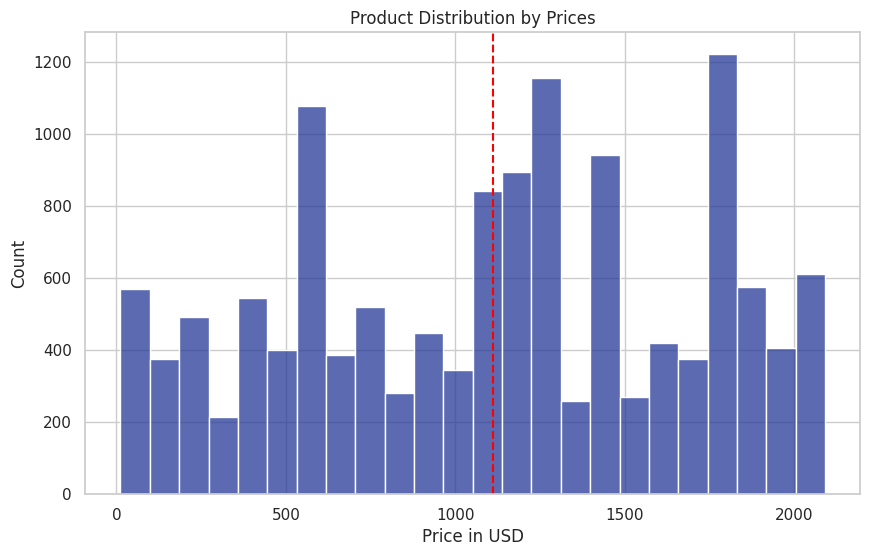

Mean:  1110.1365079248606


In [406]:
# Product Distribution by Prices

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))
sns.histplot(data=MasterClean, x='list_price')
plt.title('Product Distribution by Prices')
plt.xlabel('Price in USD')
plt.ylabel('Count')
plt.axvline(MasterClean['list_price'].mean(), color='red', linestyle='--', label='Mean')
plt.show()

print('Mean: ', MasterClean['list_price'].mean())

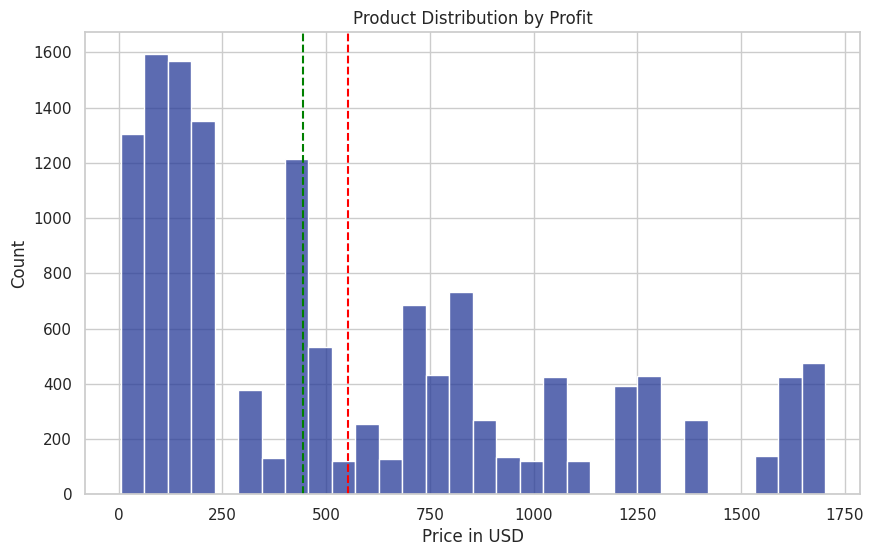

Mean:  552.2205679483417
Median:  445.2099999999999


In [407]:
# Product Distribution by Profit

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))
sns.histplot(data=MasterClean, x='profit')
plt.title('Product Distribution by Profit')
plt.xlabel('Price in USD')
plt.ylabel('Count')
plt.axvline(MasterClean['profit'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(MasterClean['profit'].median(), color='green', linestyle='--', label='Median')
plt.show()

print('Mean: ', MasterClean['profit'].mean())
print('Median: ', MasterClean['profit'].median())

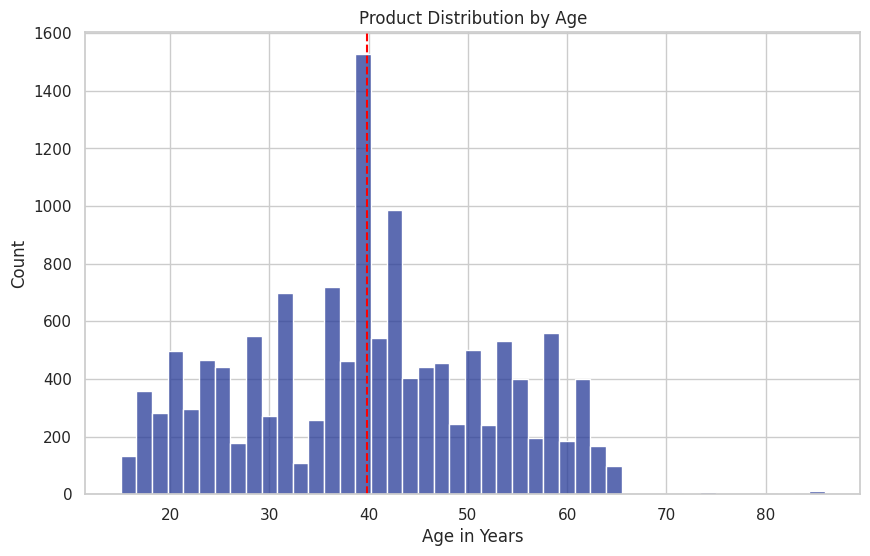

Mean:  39.8009245670678


In [408]:
# Product Distribution by age

import matplotlib.pyplot as plt
import seaborn as sns

# Convert customer_age to int64 instead of Int64
MasterClean['customer_age'] = MasterClean['customer_age'].astype('int64')

sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))
sns.histplot(data=MasterClean, x='customer_age')
plt.title('Product Distribution by Age')
plt.xlabel('Age in Years')
plt.ylabel('Count')
plt.axvline(MasterClean['customer_age'].mean(), color='red', linestyle='--', label='Mean')
plt.show()

print('Mean: ', MasterClean['customer_age'].mean())


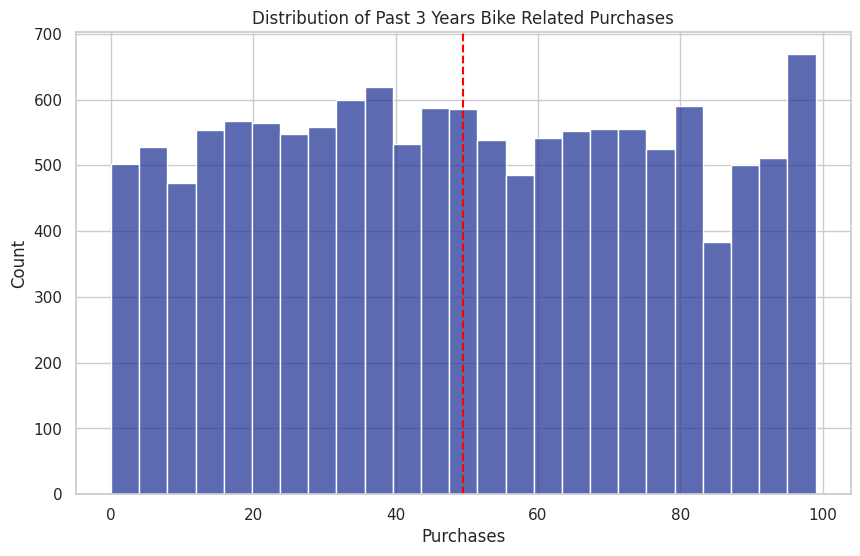

Mean:  49.495450542999706


In [409]:
# Product Distribution by age

import matplotlib.pyplot as plt
import seaborn as sns

# Convert customer_age to int64 instead of Int64
MasterClean['past_3_years_bike_related_purchases'] = MasterClean['past_3_years_bike_related_purchases'].astype('int64')

sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))
sns.histplot(data=MasterClean, x='past_3_years_bike_related_purchases')
plt.title('Distribution of Past 3 Years Bike Related Purchases')
plt.xlabel('Purchases')
plt.ylabel('Count')
plt.axvline(MasterClean['past_3_years_bike_related_purchases'].mean(), color='red', linestyle='--', label='Mean')
plt.show()

print('Mean: ', MasterClean['past_3_years_bike_related_purchases'].mean())

age_group
31-50    52.355445
14-30    25.476959
51-70    21.969475
71-90     0.198122
Name: proportion, dtype: float64


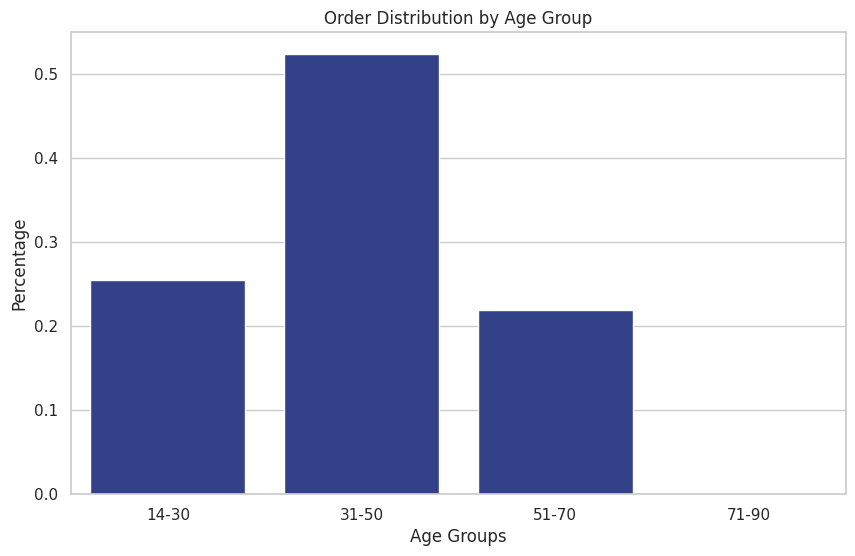

In [410]:
# Order Distribution by Age Group

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
base_color = sns.color_palette()[0]

counts = MasterClean['age_group'].value_counts(normalize=True)
sns.barplot(x= counts.index, y=counts.values, color=base_color)
plt.xlabel('Age Groups')
plt.ylabel('Percentage')
print(counts * 100)

plt.title('Order Distribution by Age Group')
plt.show()

/tmp/ipykernel_2633/3743981089.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



  age_group      profit
0     14-30  1916582.54
1     31-50  3944529.54
2     51-70  1648972.98
3     71-90    15576.84


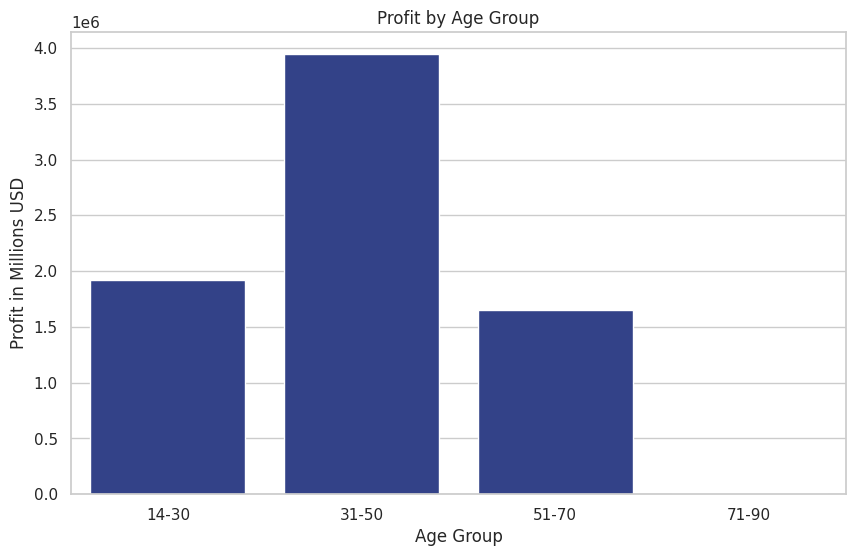

In [411]:
# Profit Distribution by Age Group

import matplotlib.pyplot as plt 
import seaborn as sns

plt.figure(figsize=(10, 6))
base_color = sns.color_palette()[0]
profit_by_age = MasterClean.groupby('age_group')['profit'].sum().reset_index()
sns.barplot(x='age_group', y='profit', data=profit_by_age, color=base_color)

# Set labels and title
plt.xlabel('Age Group')
plt.ylabel('Profit in Millions USD')
plt.title('Profit by Age Group')

print(profit_by_age.head())

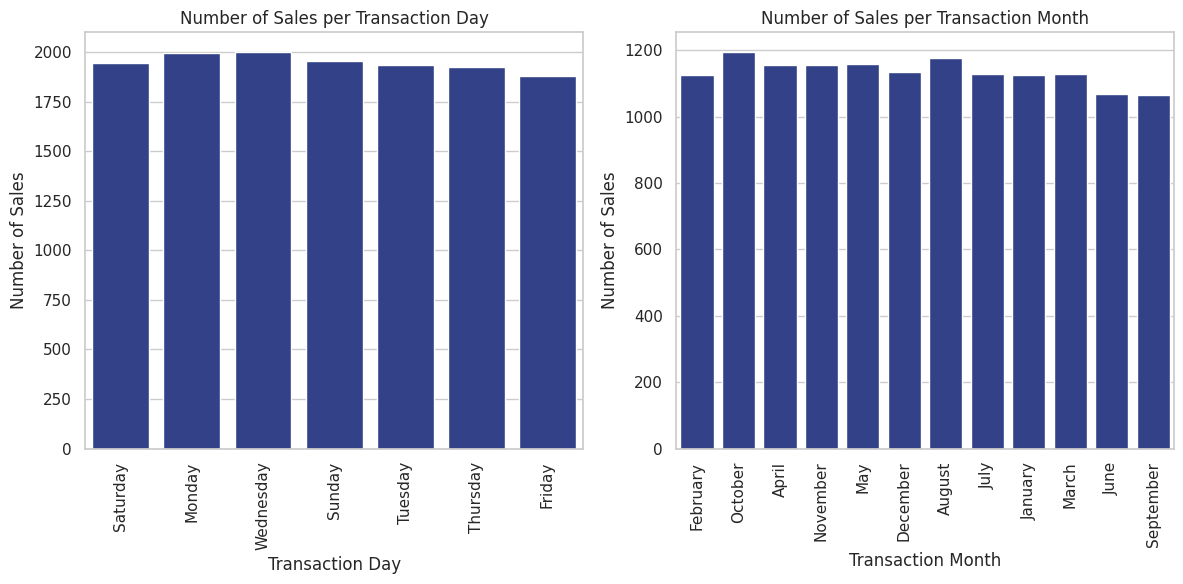

In [412]:
# Set the size of the figure
plt.figure(figsize=(12, 6))

# Bar plot for transaction day
plt.subplot(1, 2, 1)  # Subplot 1
sns.countplot(data=MasterClean, x='transaction_day', color=base_color)
plt.title('Number of Sales per Transaction Day')
plt.xticks(rotation=90)
plt.xlabel('Transaction Day')
plt.ylabel('Number of Sales')

# Bar plot for transaction month
plt.subplot(1, 2, 2)  # Subplot 2
sns.countplot(data=MasterClean, x='transaction_month', color=base_color)
plt.title('Number of Sales per Transaction Month')
plt.xlabel('Transaction Month')
plt.ylabel('Number of Sales')
plt.xticks(rotation=90)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

wealth_segment
Mass Customer        49.713824
High Net Worth       25.447608
Affluent Customer    24.838568
Name: proportion, dtype: float64


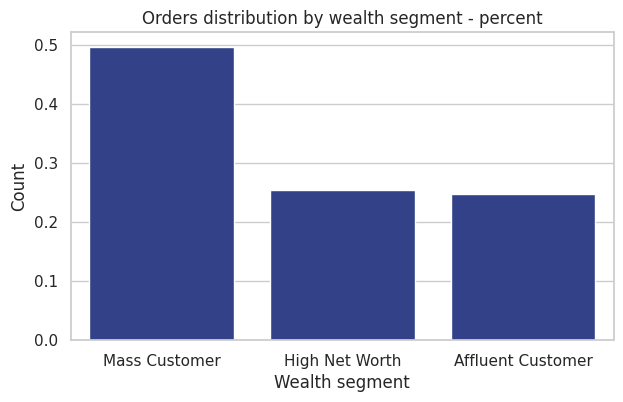

In [413]:
#Orders distribution by wealth segment
plt.figure(figsize = (7,4), dpi = 100)

counts = MasterClean['wealth_segment'].value_counts(normalize = True)
sns.barplot(x = counts.index, y = counts.values, color=base_color)
plt.xlabel('Wealth segment')
plt.ylabel('Count')
print(counts * 100)

plt.title("Orders distribution by wealth segment - percent")
plt.show()

state
NSW    52.839742
VIC    25.036689
QLD    22.050191
ACT     0.073378
Name: proportion, dtype: float64


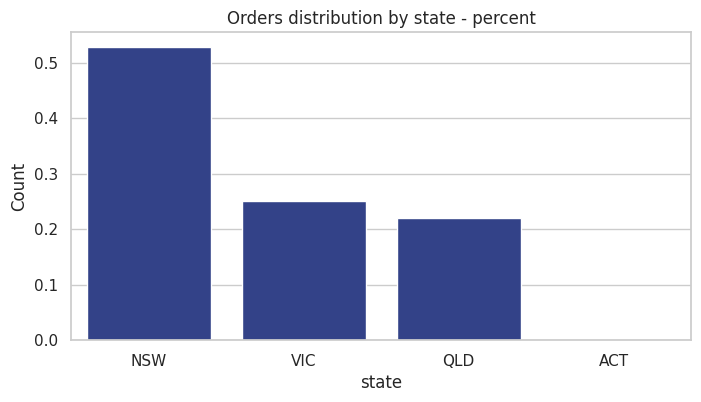

In [414]:
# Orders distribution by state
plt.figure(figsize = (8,4), dpi = 100)
counts = MasterClean['state'].value_counts(normalize = True)
sns.barplot(x = counts.index, y = counts.values, color=base_color)
plt.xlabel('state')
plt.ylabel('Count')
print(counts * 100)

plt.title("Orders distribution by state - percent")
plt.show()

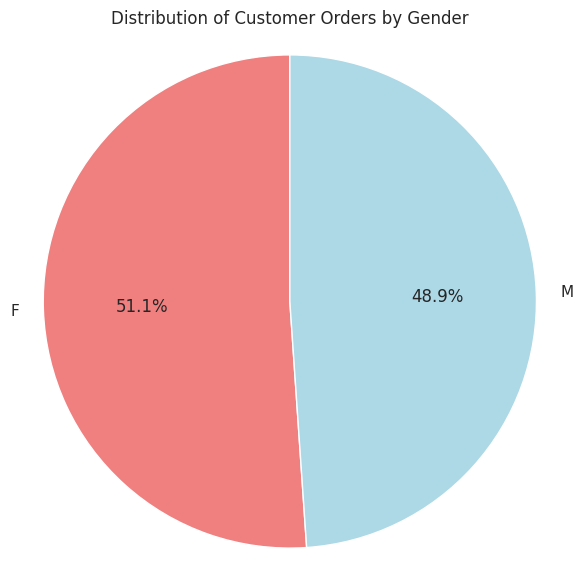

In [415]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 7), dpi=100)

counts = MasterClean['gender'].value_counts(normalize=True)
labels = counts.index
sizes = counts.values
colors = ['lightcoral', 'lightblue']  # You can customize the colors here

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

plt.title("Distribution of Customer Orders by Gender")
plt.show()

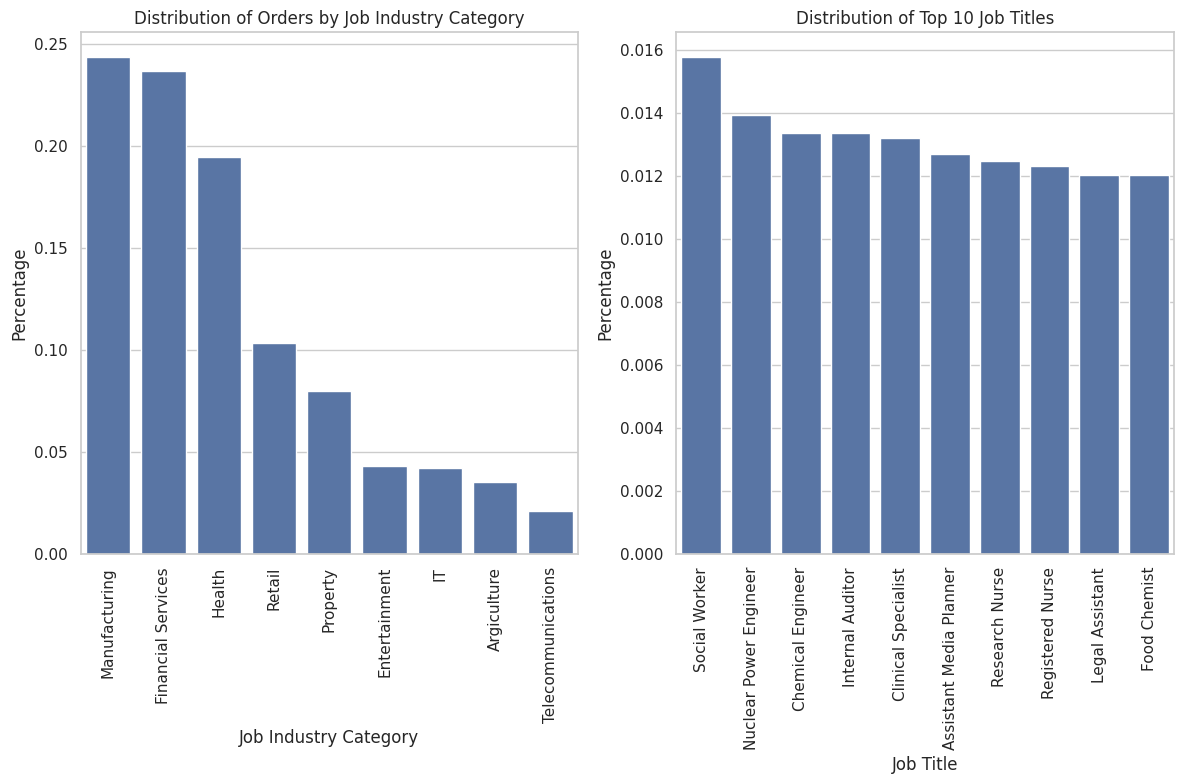

In [416]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 8))

# Plotting the distribution of orders by job industry category
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
counts_industry = MasterClean['job_industry_category'].value_counts(normalize=True)
sns.barplot(x=counts_industry.index, y=counts_industry.values, color='b')
plt.xlabel('Job Industry Category')
plt.ylabel('Percentage')
plt.xticks(rotation=90)  # Rotate x-axis labels to 90 degrees
plt.title("Distribution of Orders by Job Industry Category")

# Plotting the distribution of top 10 job titles
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
top_10_titles = MasterClean['job_title'].value_counts(normalize=True).head(10)
sns.barplot(x=top_10_titles.index, y=top_10_titles.values, color='b')
plt.xlabel('Job Title')
plt.ylabel('Percentage')
plt.xticks(rotation=90)  # Rotate x-axis labels to 90 degrees
plt.title("Distribution of Top 10 Job Titles")

plt.tight_layout()  # To prevent overlapping labels and titles
plt.show()

## Bivariate Analysis
In this section we will investigate pair of variables and check if there is any relationship between them.

### Highlights from the Bivariate Analysis
- More of women who own a car buy bikes, and more of men who do not own a car buy bikes
- NSW has the highest number of bike buyers and more Female buyers than male buyers
- More women buy bikes online than men
- Most profitable brand is WeareA2B

These are usually best left to dashboards since it requires too much code to plot in pandas.

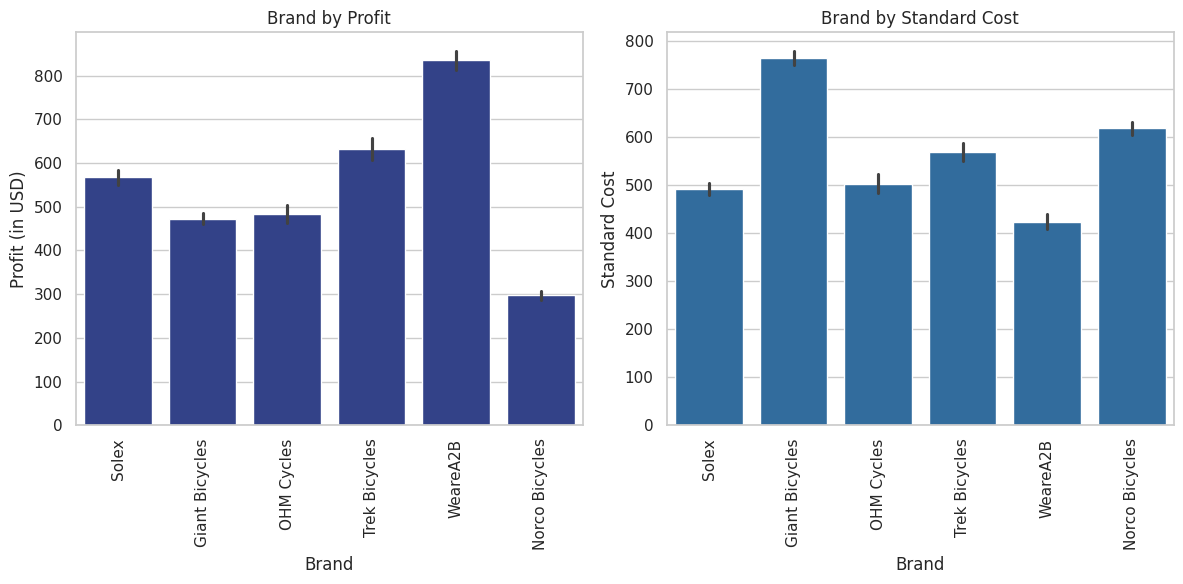

In [417]:
# Brand by Profit and Standard Cost

import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 6))

# First subplot - Profit by Brand
plt.subplot(1, 2, 1)
sns.barplot(data=MasterClean, x="brand", y='profit', color=sns.color_palette()[0])
plt.xlabel('Brand')
plt.ylabel('Profit (in USD)')
plt.xticks(rotation=90)
plt.title("Brand by Profit")

# Second subplot - Standard Cost by Brand
plt.subplot(1, 2, 2)
sns.barplot(data=MasterClean, x="brand", y='standard_cost', color=sns.color_palette()[1])
plt.xlabel('Brand')
plt.ylabel('Standard Cost')
plt.xticks(rotation=90)
plt.title("Brand by Standard Cost")

plt.tight_layout()
plt.show()

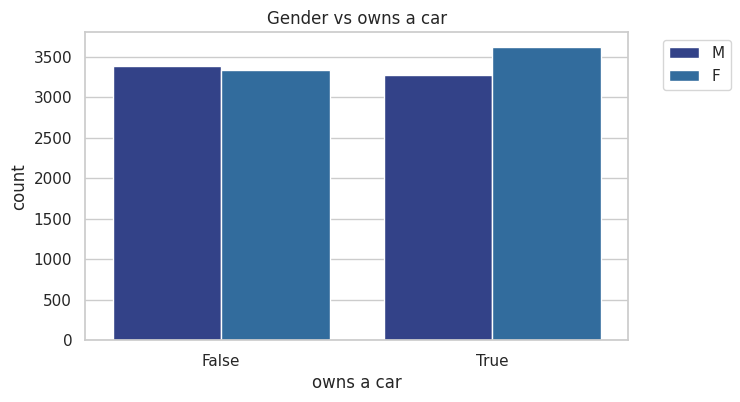

In [418]:
#Gender vs owns a car

plt.figure(figsize = (7,4), dpi = 100)

sns.countplot(data = MasterClean, x = "owns_car",hue='gender')
plt.xlabel('owns a car');
plt.ylabel('count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Gender vs owns a car")

plt.show()

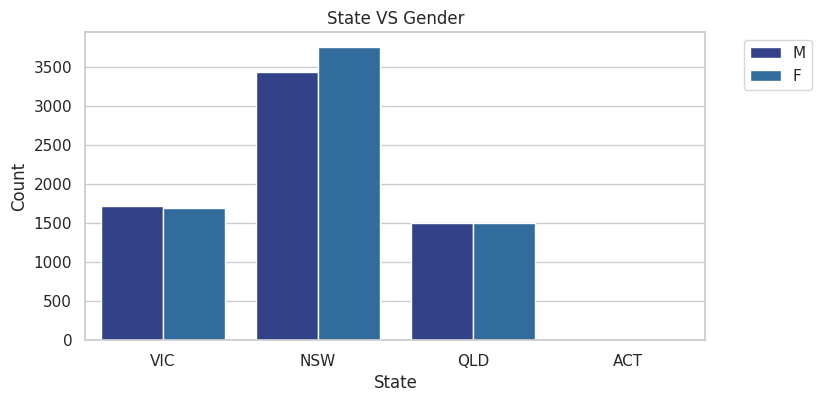

In [419]:
#State vs Gender

plt.figure(figsize = (8,4), dpi = 100)

sns.countplot(data = MasterClean, x = "state",hue='gender')
plt.xlabel('State');
plt.ylabel('Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("State VS Gender")

plt.show()

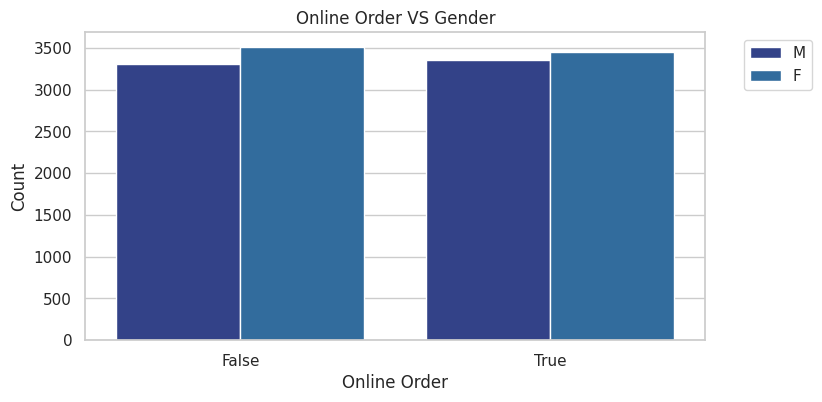

In [420]:
#State vs Gender

plt.figure(figsize = (8,4), dpi = 100)

sns.countplot(data = MasterClean, x = "online_order",hue='gender')
plt.xlabel('Online Order');
plt.ylabel('Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Online Order VS Gender")

plt.show()

/tmp/ipykernel_2633/1747977723.py:21: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_2633/1747977723.py:33: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



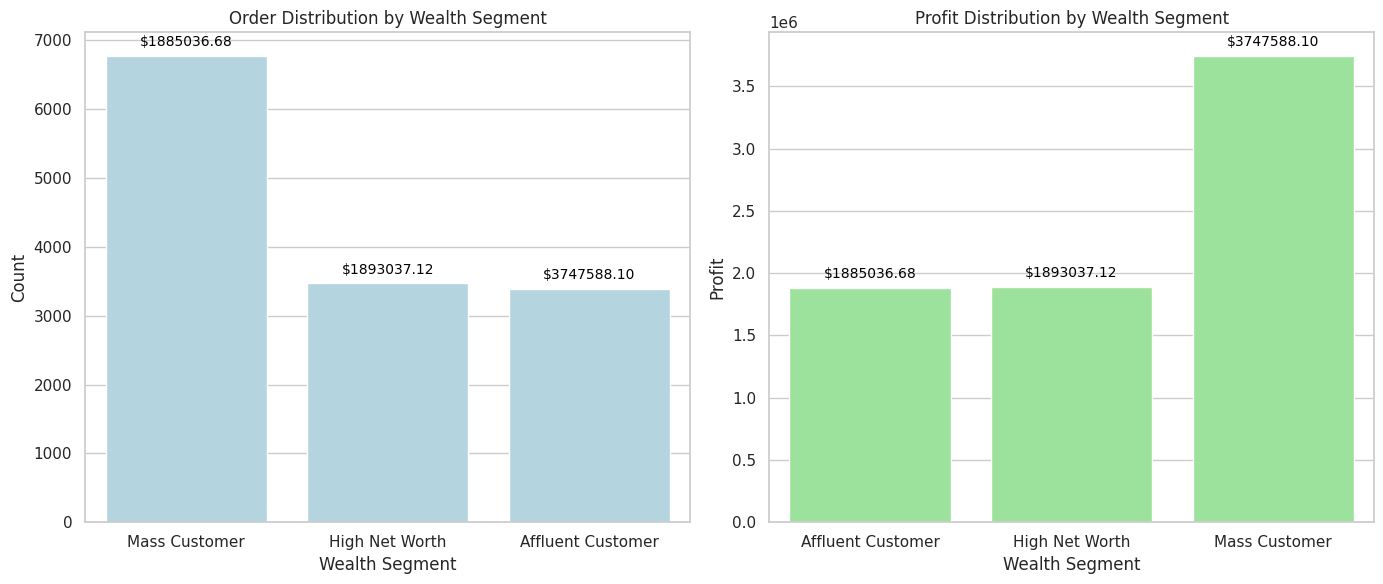

In [421]:
# Wealth Segment Percentage and Profits

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), dpi=100)

# Calculate the order count and profit per wealth segment
counts = MasterClean['wealth_segment'].value_counts()
profits = MasterClean.groupby('wealth_segment')['profit'].sum()

# Normalize the counts to percentages
counts_percent = (counts / counts.sum()) * 100

# Create a bar plot for order distribution
sns.barplot(x=counts_percent.index, y=counts.values, color='lightblue', ax=ax1)
ax1.set_xlabel('Wealth Segment')
ax1.set_ylabel('Count')
ax1.set_title("Order Distribution by Wealth Segment")

# Add profit labels to the bars in the order distribution plot
for i, p in enumerate(ax1.patches):
    ax1.annotate(f'${profits[i]:.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')

# Create a bar plot for profit distribution
sns.barplot(x=profits.index, y=profits.values, color='lightgreen', ax=ax2)
ax2.set_xlabel('Wealth Segment')
ax2.set_ylabel('Profit')
ax2.set_title("Profit Distribution by Wealth Segment")

# Add profit labels to the bars in the profit distribution plot
for i, p in enumerate(ax2.patches):
    ax2.annotate(f'${profits[i]:.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')

# Adjust spacing between subplots
plt.tight_layout()

plt.show()

## Multivariate Analysis
In this section we will use correlation matrix to find the correlation between the variables.
Nothing of what we already don't know.

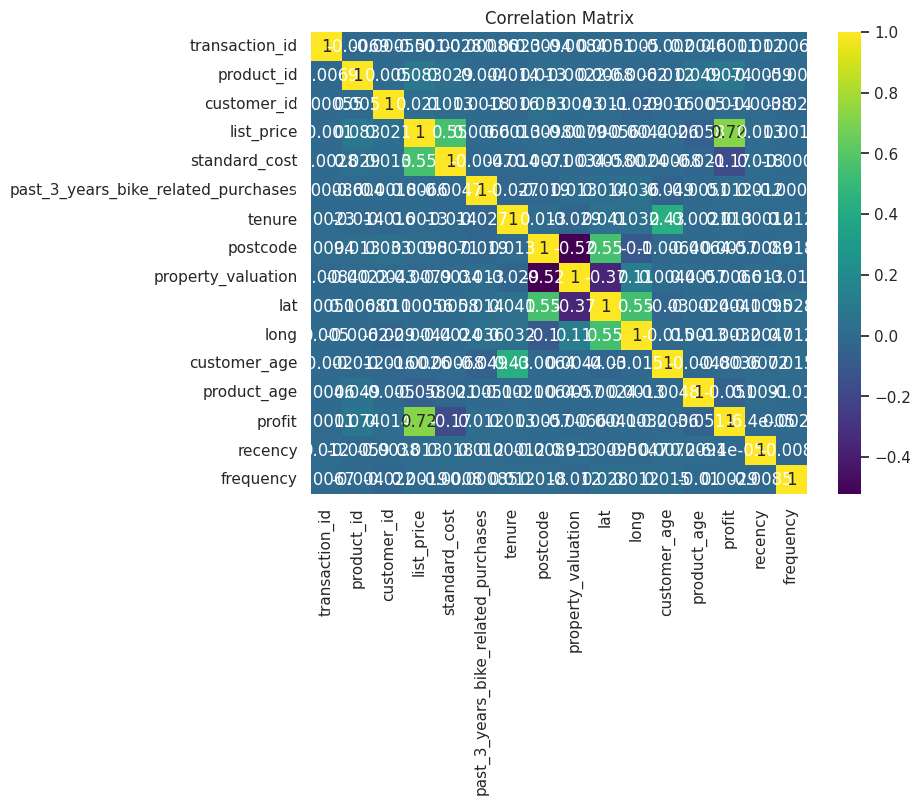

In [422]:
# Drop non-numeric columns or encode them properly
numeric_columns = MasterClean.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create the correlation matrix heatmap
plt.figure(figsize=(8,6), dpi=100)
sns.heatmap(correlation_matrix, cmap="viridis", annot=True)
plt.title("Correlation Matrix")
plt.xticks(rotation=90)
plt.show()

# Task 2 : RFM Analysis
RFM stands for Recency, Frequency and Monetary Value, it is a customer segmentation technique that uses past purchase behavior to divide customers into groups.
This will include the following steps:
- Calculating the `recency` column i.e the number of days since the last purchase
- Calculating the `frequency` column i.e the number of purchases made by a unique customer
- Calculating the `monetary` column i.e the total amount of money spent by a unique customer
- Making the `RFM` dataframe by merging the three columns

Usually we would calculate an RFM score which is also fairly easy to do, but we will be using K-Means clustering to make customer segments instead.
We will be using standard scaler and elbow method to find the optimal number of clusters.

### Creating the RFM Table
- Since we already have the `recency`, `frequency` and `profit` columns, we can make the RFM table by merging them.
- We will later map them to the master dataframe


In [423]:
# Generating the RFM Table
RfmTable = Postcoded.groupby("customer_id").agg(
    {
        "recency": lambda x: x.min(),
        "frequency": lambda x: x.count(),
        "profit": lambda x: x.sum(),
    }
)

RfmTable.rename(
    columns={
        "recency": "recency",
        "frequency": "frequency",
        "profit": "monetary",
    },
    inplace=True,
)

RfmTable.head()

recency  frequency  monetary
customer_id                              
1                  9         11   3018.09
2                130          3   2226.26
4                197          2    220.57
5                 18          6   2394.94
6                 66          5   3946.55

### Finding the Optimal Number of Clusters
- We wrote a function to scale the features (using standard scaler)
- We wrote a function to fit the KMeans algorithm on the scaled features and return the model as well as the predictions
- Make sure to run this only on the clean rfm dataframe

The elbow methods shows that the optimal number of clusters is 3, so we will classify each customer into one of these clusters.

In [424]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

def plot_elbow_method(df):
    scaler = StandardScaler()
    scaled = scaler.fit_transform(df)

    inertia = []
    for i in np.arange(1, 11):
        kmeans = KMeans(n_clusters=i, n_init=10, random_state=1) # n_init is the number of times the K-mean algorithm will run with different centroid seeds (default=10), explicityly set to 10 to suppress warning
        kmeans.fit(scaled)
        inertia.append(kmeans.inertia_)

    plt.plot(np.arange(1, 11), inertia, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal k')
    plt.show()
    
    return scaled

# Example usage:
# Assuming you have a DataFrame called 'rfm_table', you can call the function like this:
# plot_elbow_method(rfm_table)

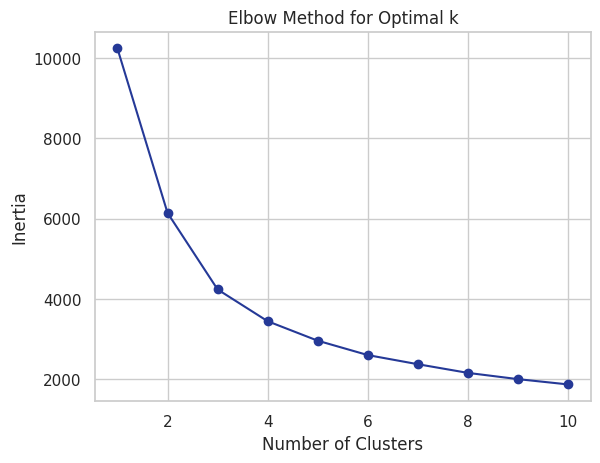

In [425]:
scaled_array = plot_elbow_method(RfmTable)

### Classifying the Customers
Now that we have the clusters, we will analyse the clusters and see which cluster has the highest profit, and then we will map the customer IDs to the clusters and then predict the high value customers.

- Gold customers are comparatively less in number but have the highest profit
- Silver customers are the most in number but struggle to keep up with the gold customers
- Bronze customers are the least in number, have the best profit to customer ratio but have the lowest overall profit
- Also Bronze customers very rarely buy any products

In [426]:
# Use k-means to cluster the RFM table

kmeans = KMeans(n_clusters=3, n_init=10, random_state=10)
kmeans.fit(scaled_array)

# +1 to make the clusters start from 1 instead of 0
RfmTable['cluster'] = kmeans.labels_+1
RfmTable.head()

recency  frequency  monetary  cluster
customer_id                                       
1                  9         11   3018.09        2
2                130          3   2226.26        3
4                197          2    220.57        3
5                 18          6   2394.94        1
6                 66          5   3946.55        1

In [427]:
# Using a ClusterMap to group clusters by their average RFM values

ClusterMap = RfmTable.groupby("cluster").agg(
    {
        "recency": "mean",
        "frequency": "mean",
        "monetary": "mean",
    }
)
ClusterMap["cluster_size"] = RfmTable.groupby("cluster")["cluster"].count()

# Sorting the ClusterMap by monetary_value in descending order
SortedClusterMap = ClusterMap.sort_values(by="monetary", ascending=False)

# Preparing the customer_category column
# customer_category = ["Platinum","Gold", "Silver", "Bronze"]
customer_category = ["Gold", "Silver", "Bronze"]
SortedClusterMap["customer_category"] = customer_category

CategoryCluster = SortedClusterMap["customer_category"].to_dict()

SortedClusterMap

recency  frequency     monetary  cluster_size customer_category
cluster                                                                    
2         40.156137   8.150722  5023.386372          1108              Gold
1         43.959677   4.846198  2312.542056          1736            Silver
3        166.327465   3.642606  1871.216673           568            Bronze

### Visualizing the Clusters
- We will make an interactive cluster plot using plotly and see if we can find any insights.
- We will also use seaborn to make a cluster plot.


In [428]:
# Using Plotly to plot the ClusterMap

import plotly.express as px

# Create an interactive 3D scatter plot
fig = px.scatter_3d(
    RfmTable,
    x='recency',
    y='frequency',
    z='monetary',
    color='cluster',
    size_max=10,
    opacity=0.7,
    labels={'recency': 'Recency', 'frequency': 'Frequency', 'monetary': 'Monetary'},
    title='RFM Clusters - Interactive 3D Scatter Plot'
)

fig.show()

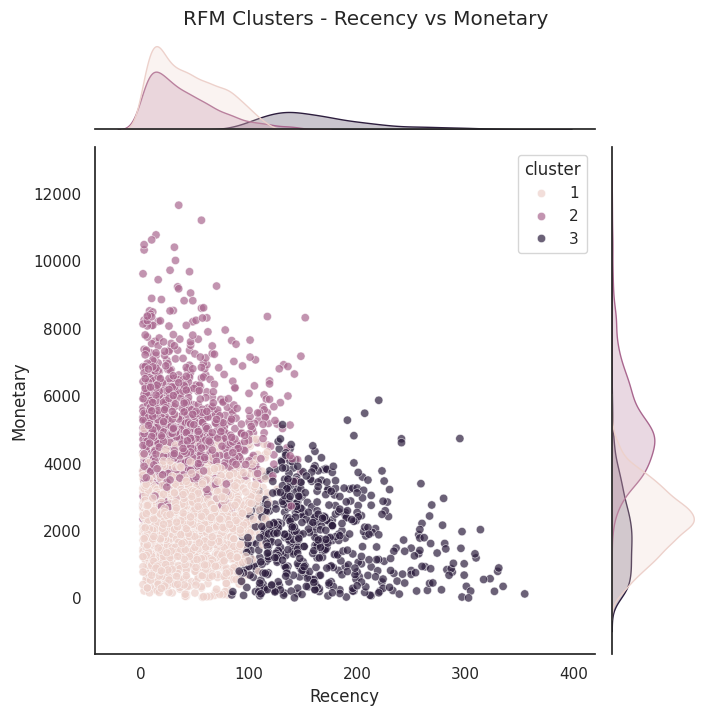

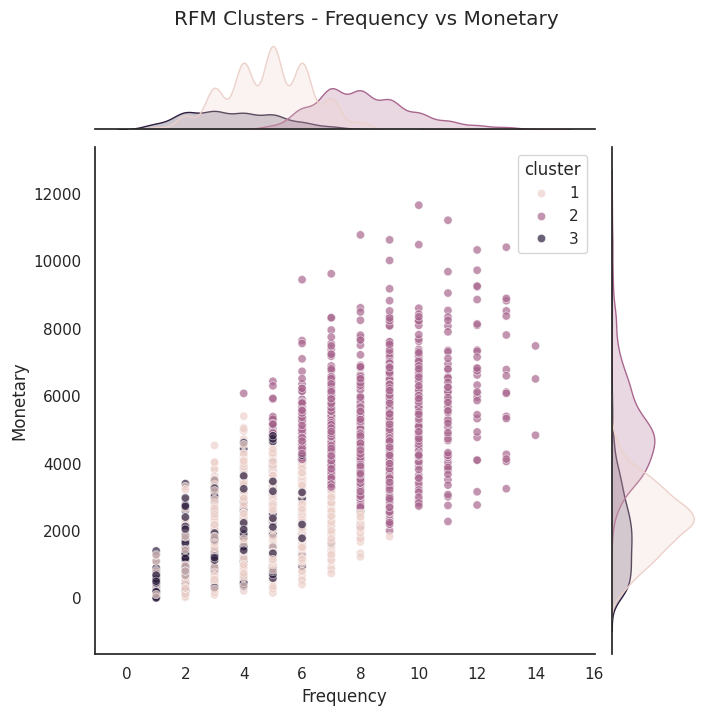

In [429]:
# Using SeaBorn to plot the ClusterMap

import seaborn as sns
import matplotlib.pyplot as plt

# Create a joint plot for 'recency' and 'monetary'
sns.set(style="white")
fig1 = sns.jointplot(
    data=RfmTable,
    x='recency',
    y='monetary',
    hue='cluster',
    alpha=0.7,
    markers=["o", "s", "D"],
    height=7
)
fig1.set_axis_labels('Recency', 'Monetary')
fig1.fig.suptitle('RFM Clusters - Recency vs Monetary', y=1.02)

# Create a joint plot for 'frequency' and 'monetary'
fig2 = sns.jointplot(
    data=RfmTable,
    x='frequency',
    y='monetary',
    hue='cluster',
    alpha=0.7,
    markers=["o", "s", "D"],
    height=7
)
fig2.set_axis_labels('Frequency', 'Monetary')
fig2.fig.suptitle('RFM Clusters - Frequency vs Monetary', y=1.02)

# Display the subplots
plt.show()

### Mapping the Clusters to the Master Dataframe
- This will add two new columns to the master dataframe, `cluster` and `customer_category`

In [430]:
# Mapping the clusters to the customers
Postcoded['cluster'] = Postcoded['customer_id'].map(RfmTable['cluster'])
Postcoded['customer_category'] = Postcoded['cluster'].map(CategoryCluster)

In [431]:
Postcoded.sample(5)

transaction_id  product_id  customer_id transaction_date online_order  \
3706            16423           9            1       2017-12-09         True   
12396            9764          97          422       2017-02-10        False   
13638           15697          54         2953       2017-10-11         True   
1927             9018          67          432       2017-05-15         True   
642             18913           4         2065       2017-05-19        False   

       order_status           brand product_line product_class product_size  \
3706           True      OHM Cycles         Road        medium       medium   
12396          True           Solex     Standard        medium        large   
13638          True        WeareA2B     Standard        medium       medium   
1927           True  Norco Bicycles         Road        medium       medium   
642            True  Giant Bicycles     Standard          high       medium   

       list_price  standard_cost    product_first_sold_date first_name  \
3706       742.54         667.40 1997-08-17 01:08:55.001556    Laraine   
12396      202.62         151.96 2010-04-11 01:08:55.001556       Vito   
13638     1807.45         778.69 1985-11-22 01:08:55.001556     Hector   
1927       544.05         376.84 2004-09-01 01:08:55.001556       Amby   
642       1129.13         677.48 1997-02-19 01:08:55.001556     Silvio   

       last_name gender  past_3_years_bike_related_purchases        DOB  \
3706   Medendorp      F                                   93 1953-10-12   
12396     Norker      M                                   78 2002-01-06   
13638  Carwithan      M                                   45 1972-10-26   
1927      Pentin      M                                   83 1990-02-12   
642     Henrichs      M                                   66 1978-03-13   

                    job_title job_industry_category     wealth_segment  \
3706      Executive Secretary                Health      Mass Customer   
12396                     NaN         Manufacturing  Affluent Customer   
13638      Recruiting Manager                Health     High Net Worth   
1927   Nuclear Power Engineer         Manufacturing  Affluent Customer   
642          Technical Writer                Retail      Mass Customer   

      deceased_indicator owns_car  tenure             address  postcode  \
3706               False     True      11  060 Morning Avenue      2016   
12396              False    False       1       509 Fisk Hill      2031   
13638              False     True       8     75848 Ohio Lane      3037   
1927               False     True      10    9 Lukken Parkway      2065   
642                False     True      12  130 Hayes Crossing      2170   

         country  property_valuation        lat        long state  \
3706   Australia                  10 -33.894912  151.206211   NSW   
12396  Australia                  11 -33.914832  151.239167   NSW   
13638  Australia                   7 -37.715579  144.780474   VIC   
1927   Australia                  10 -33.828361  151.192212   NSW   
642    Australia                   9 -33.928392  150.921448   NSW   

       customer_age  product_age age_group   profit  recency  frequency  \
3706             64         20.0     51-70    75.14       23         11   
12396            15          7.0     14-30    50.66      325          4   
13638            45         32.0     31-50  1028.76       82          5   
1927             27         13.0     14-30   167.21      231          8   
642              39         20.0     31-50   451.65      227          4   

      transaction_day transaction_week transaction_month  cluster  \
3706         Saturday               49          December        2   
12396          Friday               06          February        3   
13638       Wednesday               41           October        1   
1927           Monday               20               May        2   
642            Friday               20          

# Task 2 : Geospatial Analysis
In this section we will only focus on geopandas and try to make customer segmentation maps.
- ~~We will also try to geocode the customer adresses to get another lat and long column `geo_lat` and `geo_long`~~
- Geocoding will take a lot of time so we'll just work the with the coordinates we already have


Seems like our most sales are in coastal areas, with that lovely view guess I'll buy a bike too.

- We will make a new column `distance_from_coast` which will be the distance of the customer from the coast
- NSW has the most sales, and the most sales are in the coastal areas of NSW
- Followed by Victoria and then Queensland

In [432]:
# Pepraring the GeoCustomers dataframe
# We will use this to draw interactive maps

GeoCustomers = Postcoded.copy()

# Use groupby to get unique customer_id 
GeoCustomers = GeoCustomers.groupby('customer_id').first().reset_index()
GeoCustomers = GeoCustomers[['customer_id', 'lat', 'long', 'state', 'cluster', 'customer_category']]

GeoCustomers.head()

customer_id        lat        long state  cluster customer_category
0            1 -33.894912  151.206211   NSW        2              Gold
1            2 -33.731651  150.955942   NSW        3            Bronze
2            4 -28.035453  153.241258   QLD        3            Bronze
3            5 -30.604667  152.956681   NSW        1            Silver
4            6 -38.215906  144.334005   VIC        1            Silver

### Marker Cluster

In [433]:
# Importing Folium and Geopandas
import geopandas as gpd
import folium

# Importing folium plugins
from folium.plugins import MarkerCluster, HeatMap

# Creating a simple map
m_1 = folium.Map(location=[-25.2744, 133.7751], tiles='cartodbpositron', zoom_start=4)

# Adding transaction points to the map using MarkerCluster
mc = MarkerCluster()
for idx, row in GeoCustomers.iterrows():
    if not np.isnan(row['lat']) and not np.isnan(row['long']):
        mc.add_child(folium.Marker([row['lat'], row['long']]))
        
m_1.add_child(mc)

# Display the map
m_1

### Heatmap

In [434]:
# Drawing a heatmap of the transaction points
m_2 = folium.Map(location=[-25.2744, 133.7751], tiles='cartodbpositron', zoom_start=4)

# Adding transaction points to the map using HeatMap
HeatMap(data=GeoCustomers[['lat', 'long']], radius=15).add_to(m_2)

# Display the map
m_2


### Bubble Map

In [435]:
# Draw a bubble map to visualize the customer catergories gold, silver and bronze

# Create a base map
m_3 = folium.Map(location=[-25.2744, 133.7751], tiles='cartodbpositron', zoom_start=4)

# Add a bubble map to the base map
for idx, row in GeoCustomers.iterrows():
    if not np.isnan(row['lat']) and not np.isnan(row['long']):
        if row['customer_category'] == 'Gold':
            folium.CircleMarker([row['lat'], row['long']], radius=5, color='yellow', fill=True).add_to(m_3)
        elif row['customer_category'] == 'Silver':
            folium.CircleMarker([row['lat'], row['long']], radius=5, color='blue', fill=True).add_to(m_3)
        elif row['customer_category'] == 'Bronze':
            folium.CircleMarker([row['lat'], row['long']], radius=5, color='brown', fill=True).add_to(m_3)
            
# Display the map
m_3
            

## Analysing Coastline Proximity
Refer to this [notebook](https://www.kaggle.com/code/notcostheta/shortest-distance-to-a-coastline/notebook) for the code.


In [436]:
GeoCustomers

customer_id        lat        long state  cluster customer_category
0               1 -33.894912  151.206211   NSW        2              Gold
1               2 -33.731651  150.955942   NSW        3            Bronze
2               4 -28.035453  153.241258   QLD        3            Bronze
3               5 -30.604667  152.956681   NSW        1            Silver
4               6 -38.215906  144.334005   VIC        1            Silver
...           ...        ...         ...   ...      ...               ...
3407         3496 -33.937716  150.848737   NSW        3            Bronze
3408         3497 -38.043995  145.264296   VIC        1            Silver
3409         3498 -37.807135  144.861162   VIC        3            Bronze
3410         3499 -27.549179  152.951385   QLD        2              Gold
3411         3500 -33.766409  151.257781   NSW        3            Bronze

[3412 rows x 6 columns]

In [437]:
from shapely.ops import nearest_points, Point
import haversine as hs
from haversine import Unit

def coastline_minima(df, lat_col, long_col, country):
    """
    This function takes in a dataframe with latitude and longitude columns and returns the nearest point on the coastline and the distance in km

    Required libraries: geopandas, shapely, folium, haversine
    Returns: original dataframe with two new columns: nearest_point and distance_to_coast

    """
    # Getting the coastline
    world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
    coastline = world[world.name.str.contains(country)].boundary

    # Creating empty lists to store the nearest point and the distance
    nearest_points_list = []
    distance_list = []

    for i in range(len(df)):
        geo = Point(df[long_col][i], df[lat_col][i])
        nearest = nearest_points(geo, coastline)[1]
        cos = Point(nearest.x, nearest.y)
        loc1 = (geo.y, geo.x)
        loc2 = (cos.y, cos.x)
        result = hs.haversine(loc1, loc2, unit=Unit.KILOMETERS)

        nearest_points_list.append(nearest)
        distance_list.append(result)

    # Adding the new columns to the dataframe
    df["nearest_point"] = nearest_points_list
    df["distance_to_coast"] = distance_list

    return df


In [438]:
coastline_minima(GeoCustomers, 'lat', 'long', 'Australia')
GeoCustomers.head()


/tmp/ipykernel_2633/1020208499.py:14: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



customer_id        lat        long state  cluster customer_category  \
0            1 -33.894912  151.206211   NSW        2              Gold   
1            2 -33.731651  150.955942   NSW        3            Bronze   
2            4 -28.035453  153.241258   QLD        3            Bronze   
3            5 -30.604667  152.956681   NSW        1            Silver   
4            6 -38.215906  144.334005   VIC        1            Silver   

                                       nearest_point  distance_to_coast  
0  137    POINT (151.26433 -33.93411)
dtype: geom...           6.910553  
1  137    POINT (151.26176 -33.93792)
dtype: geom...          36.385439  
2  137    POINT (153.45911 -27.91328)
dtype: geom...          25.342373  
3  137    POINT (153.07812 -30.60035)
dtype: geom...          11.632766  
4  137    POINT (144.33147 -38.21284)
dtype: geom...           0.406144

In [439]:
# Merging Geocustomers dataframe with the Postcoded dataframe

Postcoded = pd.merge(
    Postcoded,
    GeoCustomers[['customer_id', 'nearest_point', 'distance_to_coast']],
    how="inner",
    left_on="customer_id",
    right_on="customer_id",
)


In [440]:
Postcoded.sample(5)

transaction_id  product_id  customer_id transaction_date online_order  \
921             15560          86          777       2017-01-27        False   
6484             4573          31         1321       2017-02-07         True   
6487              944          42         1278       2017-07-31         True   
19207           17530          45          181       2017-11-10        False   
11704            6768           7         1787       2017-07-22        False   

       order_status           brand product_line product_class product_size  \
921            True  Norco Bicycles         Road          high        large   
6484           True  Giant Bicycles     Standard        medium       medium   
6487           True      OHM Cycles         Road        medium        small   
19207          True           Solex     Standard        medium       medium   
11704          True  Giant Bicycles     Standard        medium        small   

       list_price  standard_cost    product_first_sold_date first_name  \
921        774.53         464.72 1997-03-30 01:08:55.001556   Wolfgang   
6484       230.91         173.18 2000-11-22 01:08:55.001556       Bree   
6487      1810.00        1610.90 2002-04-01 01:08:55.001556      Betsy   
19207      441.49          84.99 1987-04-25 01:08:55.001556      Pavla   
11704     1311.44        1167.18 1991-05-23 01:08:55.001556       Tull   

         last_name gender  past_3_years_bike_related_purchases        DOB  \
921        Tarrier      M                                    2 1993-01-09   
6484       Domenge      F                                   29 1994-07-05   
6487      Schruurs      F                                   14 1998-11-15   
19207      Braunle      F                                   49 1982-11-21   
11704  Godehard.sf      M                                    2 1976-11-21   

                 job_title job_industry_category     wealth_segment  \
921              Paralegal    Financial Services     High Net Worth   
6484                Editor           Argiculture  Affluent Customer   
6487            Pharmacist                Health  Affluent Customer   
19207        Senior Editor         Manufacturing      Mass Customer   
11704  Executive Secretary                Retail     High Net Worth   

      deceased_indicator owns_car  tenure              address  postcode  \
921                False    False       4       6 Melody Trail      2145   
6484               False    False       8  57384 Sycamore Park      4370   
6487               False    False       2     41 Knutson Alley      4370   
19207              False    False       9  8256 Annamark Court      3638   
11704              False     True      13   79427 Hudson Trail      3677   

         country  property_valuation        lat        long state  \
921    Australia                   9 -33.793823  150.975154   NSW   
6484   Australia                   6 -28.195678  151.951461   QLD   
6487   Australia                   4 -28.195678  151.951461   QLD   
19207  Australia                   1 -36.032020  145.246572   VIC   
11704  Australia                   1 -36.358017  146.330564   VIC   

       customer_age  product_age age_group  profit  recency  frequency  \
921              24         20.0     14-30  309.81      339          6   
6484             23         17.0     14-30   57.73      328          7   
6487             19         15.0     14-30  199.10      154          4   
19207            35         30.0     31-50  356.50       52          6   
11704            41         26.0     31-50  144.26      163          6   

      transaction_day transaction_week transaction_month  cluster  \
921            Friday               04           January        1   
6484          Tuesday               06          February        1   
6487           Monday               31              July        1   
19207          Friday               45          November        1   
11704        Saturday               29              Ju

# Task 3 : Model Development
Final task of this project, we will use all the data and features we built earlier and make a machine learning model to predict which customer segment the new customers will fall into.

We will build two models
- a simple logistic regression model
- a HistGradientBoostingClassifier model

We will also use RandomSearchCV to find the best parameters for the models.

## Data Preprocessing
Lets see what we are working with
- We have `Postcoded` as the Training Data
- We have `NewCustomerList` as the Testing Data

We need to add features to the testing data as well.

In [441]:
Train = Postcoded.copy()
Train.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'country',
       'property_valuation', 'lat', 'long', 'state', 'customer_age',
       'product_age', 'age_group', 'profit', 'recency', 'frequency',
       'transaction_day', 'transaction_week', 'transaction_month', 'cluster',
       'customer_category', 'nearest_point', 'distance_to_coast'],
      dtype='object')

In [442]:
Test = NewCustomerList.copy()
Test.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Rank', 'Value'],
      dtype='object')

## Feature Engineering
We'll be engineering the following features in the test data:
- customer_age
- age_group
- lat, long
- distance_to_coast

So basically we will only be expanding the DOB and postcode columns.
Lets also try and multiply the property_valuation with the tenure, that might do something.

And we will add two more features based on the Property Valuation and Tenure to both the Training and Testing Data

- tenure_valuation_mul
- tenure_valuation_div

And also `potential_customer_id` to the testing data

### Age and Age Group
- customer_age
- age_group

In [443]:
# Customer Age Feature
Test["DOB"] = pd.to_datetime(Test["DOB"])
Test["customer_age"] = (end_date - Test["DOB"]).dt.days // 365.25
Test["customer_age"] = Test["customer_age"].astype("Int64")

# Keeping only the values between 14 and 100
Test = Test[Test["customer_age"].between(14, 100)]


In [444]:
# Calculate the Age Group
age_group = pd.cut(
    Test["customer_age"],
    bins=[14,30,50,70,90],
    labels=["14-30","30-50","50-70","70-90"]
)

Test["age_group"] = age_group

### Geo Location
- lat
- long
- distance_to_coast
- state
- nearest_point

In [445]:
# Adding the Coordinate Columns
Test = pd.merge(
    Test,
    Postcodes[['postcode', 'lat', 'long', 'state']],
    how="inner",
    left_on="postcode",
    right_on="postcode",
)

print(Test.shape)
print(Postcodes.shape)

# Dropping the state_x column
Test.drop(columns="state_x", inplace=True)
Test.rename(columns={"state_y": "state"}, inplace=True)

Test.sample(5)

(983, 23)
(3167, 4)


first_name  last_name gender  past_3_years_bike_related_purchases  \
476      Harman      Lynds      M                                    4   
686     Corinna    Beretta      F                                   24   
449        Cami  Barnbrook      F                                    8   
134  Maximilian     Geffen      M                                   96   
567      Zollie   Crinidge      M                                   39   

           DOB                  job_title job_industry_category  \
476 1961-05-27                  Professor                   NaN   
686 1996-02-29             Programmer III                Health   
449 1963-01-01     Occupational Therapist                Health   
134 1955-07-13  Automation Specialist III         Manufacturing   
567 1988-01-10    Systems Administrator I                Retail   

        wealth_segment deceased_indicator owns_car  tenure  \
476      Mass Customer              False     True       5   
686     High Net Worth              False    False      12   
449  Affluent Customer              False     True      18   
134      Mass Customer              False     True      20   
567      Mass Customer              False     True      10   

                 address  postcode    country  property_valuation  Rank  \
476         538 Gina Way      4105  Australia                   8   240   
686  72 Mccormick Circle      3023  Australia                   7   408   
449       890 Truax Lane      4285  Australia                   2   218   
134   8634 Wayridge Pass      2750  Australia                   8   606   
567       0 Esker Avenue      4019  Australia                   5   297   

        Value  customer_age age_group        lat        long state  
476  1.090000            56     50-70 -27.534438  153.018893   QLD  
686  0.929688            21     14-30 -37.782720  144.770641   VIC  
449  1.126250            54     50-70 -28.056979  152.975131   QLD  
134  0.765000            62     50-70 -33.755476  150.678551   NSW  
567  1.030625            29     14-30 -27.248337  153.088498   QLD

In [446]:
# Caculating the distance to coast
Test = coastline_minima(Test, 'lat', 'long', 'Australia')

/tmp/ipykernel_2633/1020208499.py:14: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



### Tenure and Property Valuation
- tenure_valuation_mul
- tenure_valuation_div

In [447]:
# Multiplying and Dividing the tenure and property_valuation

Train["tenure_valuation_mul"] = Train["tenure"] * Train["property_valuation"]
Train["tenure_valuation_div"] = Train["tenure"] / Train["property_valuation"]

# Same for Test

Test["tenure_valuation_mul"] = Test["tenure"] * Test["property_valuation"]
Test["tenure_valuation_div"] = Test["tenure"] / Test["property_valuation"]

### Potential Customer ID
- potential_customer_id

In [448]:
Test['potential_customer_id'] = Test.index + 1

## Building a Basic Logistic Regression Model
- We will copy the training data to `data`
- Look out for leakage while building the model, drop all the columns that are not present in the testing data
- Also drop the columns that can't be classified as numerical or categorical

### Feature Selection
- defining `cols` with all the features that are supposed to go into data

In [449]:
# Getting all the valid columns for building the model

cols = [
    "gender",
    "past_3_years_bike_related_purchases",
    "job_title",
    "job_industry_category",
    "wealth_segment",
    "deceased_indicator",
    "owns_car",
    "tenure",
    "property_valuation",
    "lat",
    "long",
    "state",
    "customer_age",
    "age_group",
    "distance_to_coast",
    "tenure_valuation_mul",
    "tenure_valuation_div",
    "customer_category",
]

data = Train[cols]

In [450]:
# Defining the target variable

target_name = "customer_category"
target = data[target_name]

data = data.drop(columns=target_name)

### Defining Categorical and Numerical Columns
- We will convert all the datatypes appropriately so that there's only either objects or numbers in the dataframe
- We will use sklearns `make_column_selector` to select the columns

In [451]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19513 entries, 0 to 19512
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   gender                               19513 non-null  object  
 1   past_3_years_bike_related_purchases  19513 non-null  Int64   
 2   job_title                            17173 non-null  object  
 3   job_industry_category                16291 non-null  object  
 4   wealth_segment                       19513 non-null  object  
 5   deceased_indicator                   19513 non-null  object  
 6   owns_car                             19513 non-null  object  
 7   tenure                               19513 non-null  Int64   
 8   property_valuation                   19513 non-null  Int64   
 9   lat                                  19513 non-null  float64 
 10  long                                 19513 non-null  float64 
 11  state          

In [452]:
# Convert age_group to object
data["age_group"] = data["age_group"].astype("object")

# Convert bools to object
bool_cols = data.columns[data.dtypes.eq("bool")]
data[bool_cols] = data[bool_cols].astype("object")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19513 entries, 0 to 19512
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   gender                               19513 non-null  object 
 1   past_3_years_bike_related_purchases  19513 non-null  Int64  
 2   job_title                            17173 non-null  object 
 3   job_industry_category                16291 non-null  object 
 4   wealth_segment                       19513 non-null  object 
 5   deceased_indicator                   19513 non-null  object 
 6   owns_car                             19513 non-null  object 
 7   tenure                               19513 non-null  Int64  
 8   property_valuation                   19513 non-null  Int64  
 9   lat                                  19513 non-null  float64
 10  long                                 19513 non-null  float64
 11  state                       

In [453]:
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
category_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(data)
category_columns = category_columns_selector(data)

# Print the lengths of numerical_columns, category_columns, and data.columns
print(f"Number of numerical columns: {len(numerical_columns)}")
print(f"Number of categorical columns: {len(category_columns)}")
print(f"Total number of columns: {len(data.columns)}")

Number of numerical columns: 9
Number of categorical columns: 8
Total number of columns: 17


### Building the Pipeline

In [454]:
# One-hot encoding the categorical columns and standardizing the numerical columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler

categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()

In [455]:
# Creating the Transformer and preprocessor object
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    [
        ("cat-preprocessor", categorical_preprocessor, category_columns),
        ("num-preprocessor", numerical_preprocessor, numerical_columns),
    ]
)

In [456]:
# Building a model with a pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(preprocessor, LogisticRegression(max_iter=1000))
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat-preprocessor',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'job_title',
                                                   'job_industry_category',
                                                   'wealth_segment',
                                                   'deceased_indicator',
                                                   'owns_car', 'state',
                                                   'age_group']),
                                                 ('num-preprocessor',
                                                  StandardScaler(),
                                                  ['past_3_years_bike_related_purchases',
                                                   'tenure',
                                                   'property_valuation', 'lat',
                                                   'long', 'customer_age',
                                                   'distance_to_coast',
                                                   'tenure_valuation_mul',
                                                   'tenure_valuation_div'])])),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [457]:
# Making the train-test split

from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    data, target, test_size=0.2, random_state=42
)

In [458]:
_ = model.fit(data_train, target_train)

In [459]:
data_test.head()

gender  past_3_years_bike_related_purchases               job_title  \
9530       F                                   60  Administrative Officer   
385        M                                   68       Financial Analyst   
15307      M                                   56                  Editor   
4153       F                                   78        Quality Engineer   
8658       M                                   23               Librarian   

      job_industry_category     wealth_segment deceased_indicator owns_car  \
9530     Financial Services     High Net Worth              False    False   
385      Financial Services      Mass Customer              False    False   
15307    Financial Services      Mass Customer              False    False   
4153     Financial Services  Affluent Customer              False     True   
8658          Entertainment      Mass Customer              False    False   

       tenure  property_valuation        lat        long state  customer_age  \
9530       12                   7 -37.869072  144.999026   VIC            38   
385         3                  10 -33.731523  150.931074   NSW            36   
15307       5                  10 -37.744406  145.082685   VIC            41   
4153       17                  11 -33.732380  151.000948   NSW            43   
8658       10                   8 -33.783751  150.900547   NSW            48   

      age_group  distance_to_coast  tenure_valuation_mul  tenure_valuation_div  
9530      31-50           3.973526                    84              1.714286  
385       31-50          38.424585                    30                   0.3  
15307     31-50          17.449963                    50                   0.5  
4153      31-50          32.667056                   187              1.545455  
8658      31-50          38.026580                    80                  1.25

### Scores and Predictions
- Model Score `0.5318985395849347`

In [460]:
model.predict(data_test)[:5]

array(['Gold', 'Gold', 'Silver', 'Gold', 'Gold'], dtype=object)

In [461]:
target_test[:5]

9530     Bronze
385        Gold
15307      Gold
4153       Gold
8658       Gold
Name: customer_category, dtype: object

In [462]:
model.score(data_test, target_test)

0.5318985395849347

In [463]:
# Evaluating the model with cross-validation
from sklearn.model_selection import cross_validate

cv_results = cross_validate(model, data, target, cv=5)
cv_results

{'fit_time': array([4.60049963, 5.94263744, 3.17461133, 3.25982237, 3.22253752]),
 'score_time': array([0.03487253, 0.04173183, 0.04273152, 0.02551866, 0.03740406]),
 'test_score': array([0.46682039, 0.45836536, 0.46169613, 0.47514095, 0.46258329])}

In [464]:
# Getting the final score for our model

scores = cv_results["test_score"]

# Print mean cross-validation accuracy
print(f"Mean Accuracy: {scores.mean():.3f}")
print(f"Accuracy standard deviation: {scores.std():.3f}")

Mean Accuracy: 0.465
Accuracy standard deviation: 0.006


## Building a Better Model
- `HistGradientBoostingClassifier` is a better model than our naive logistic regression model
- We will use `RandomizedSearchCV` to find the best parameters for the model

Apparently Scaling numerical features is indeed useless for most decision tree models in general and for HistGradientBoostingClassifier in particular.
We get better results with the Ordinal Encoder than with the One Hot Encoder, and Scaling the numerical features does not make a difference.

Visit [here](https://inria.github.io/scikit-learn-mooc/python_scripts/03_categorical_pipeline_sol_02.html) for more information.

|                   | Meaningful order | Non-meaningful order |
|-------------------|------------------|----------------------|
| Tree-based model  | OrdinalEncoder   | OrdinalEncoder       |
| Linear model      | OrdinalEncoder with caution | OneHotEncoder |

- OneHotEncoder : always does something meaningful, but can be unnecessarily slow with trees.
- OrdinalEncoder : can be detrimental for linear models unless your category has a meaningful order and you make sure that OrdinalEncoder respects this order. Trees can deal with OrdinalEncoder fine as long as they are deep enough.


Hence we will use the Ordinal Encoder for the categorical features, for our use case since it is giving us the best score.

### Bulding the Pipeline
- We will build a pipeline with Ordinal Encoder and HistGradientBoostingClassifier


In [465]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=42
)

In [466]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_selector as selector

categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(data)

categorical_preprocessor = OrdinalEncoder(
    handle_unknown="use_encoded_value", unknown_value=-1
)
preprocessor = ColumnTransformer(
    [("cat_preprocessor", categorical_preprocessor, categorical_columns)],
    remainder="passthrough",
)

In [467]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.pipeline import Pipeline

model = Pipeline(
    [
        ("preprocessor", preprocessor),
        (
            "classifier",
            HistGradientBoostingClassifier(random_state=42, max_leaf_nodes=4),
        ),
    ]
)

model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessor',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['gender', 'job_title',
                                                   'job_industry_category',
                                                   'wealth_segment',
                                                   'deceased_indicator',
                                                   'owns_car', 'state',
                                                   'age_group'])])),
                ('classifier',
                 HistGradientBoostingClassifier(max_leaf_nodes=4,
                                                random_state=42))])

### Applying RandomizedSearchCV on the Pipeline
- Code referenced form [INRIA MOOC](https://inria.github.io/scikit-learn-mooc/python_scripts/parameter_tuning_randomized_search.html)

```python
The best parameters are:
{'classifier__l2_regularization': 0.022391943681217833,
 'classifier__learning_rate': 0.006270138607046264,
 'classifier__max_bins': 4,
 'classifier__max_leaf_nodes': 142,
 'classifier__min_samples_leaf': 31}
 ```

In [468]:
from scipy.stats import loguniform


class loguniform_int:
    """Integer valued version of the log-uniform distribution"""

    def __init__(self, a, b):
        self._distribution = loguniform(a, b)

    def rvs(self, *args, **kwargs):
        """Random variable sample"""
        return self._distribution.rvs(*args, **kwargs).astype(int)

In [469]:
%%time
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    "classifier__l2_regularization": loguniform(1e-6, 1e3),
    "classifier__learning_rate": loguniform(0.001, 10),
    "classifier__max_leaf_nodes": loguniform_int(2, 256),
    "classifier__min_samples_leaf": loguniform_int(1, 100),
    "classifier__max_bins": loguniform_int(2, 255),
}

model_random_search = RandomizedSearchCV(
    model,
    param_distributions=param_distributions,
    n_iter=5,
    cv=5,
    verbose=1,
    n_jobs=-1,
)
model_random_search.fit(data_train, target_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


CPU times: user 30.7 s, sys: 1.14 s, total: 31.8 s
Wall time: 19.2 s


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('cat_preprocessor',
                                                                               OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                              unknown_value=-1),
                                                                               ['gender',
                                                                                'job_title',
                                                                                'job_industry_category',
                                                                                'wealth_segment',
                                                                                'deceased_indicator',
                                                                                'owns_car',
                                                                                'state',
                                                                                'age_group'])])),
                                             ('classifier',
                                              HistGr...
                   param_distributions={'classifier__l2_regularization': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f8fb674a290>,
                                        'classifier__learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f90238678e0>,
                                        'classifier__max_bins': <__main__.loguniform_int object at 0x7f8fc057a290>,
                                        'classifier__max_leaf_nodes': <__main__.loguniform_int object at 0x7f8fc0578070>,
                                        'classifier__min_samples_leaf': <__main__.loguniform_int object at 0x7f9023864670>},
                   verbose=1)

### Checking Accuracy of the Model

In [470]:
accuracy = model_random_search.score(data_test, target_test)

print(f"The test accuracy score of the best model is {accuracy:.2f}")

The test accuracy score of the best model is 0.99


In [471]:
from pprint import pprint

print("The best parameters are:")
pprint(model_random_search.best_params_)

The best parameters are:
{'classifier__l2_regularization': 1.0411258419698055,
 'classifier__learning_rate': 0.09255909111976765,
 'classifier__max_bins': 19,
 'classifier__max_leaf_nodes': 129,
 'classifier__min_samples_leaf': 92}


In [472]:
# get the parameter names
column_results = [f"param_{name}" for name in param_distributions.keys()]
column_results += ["mean_test_score", "std_test_score", "rank_test_score"]

cv_results = pd.DataFrame(model_random_search.cv_results_)
cv_results = cv_results[column_results].sort_values(
    "mean_test_score", ascending=False
)


def shorten_param(param_name):
    if "__" in param_name:
        return param_name.rsplit("__", 1)[1]
    return param_name


cv_results = cv_results.rename(shorten_param, axis=1)
cv_results

l2_regularization learning_rate max_leaf_nodes min_samples_leaf max_bins  \
1          1.041126      0.092559            129               92       19   
4          0.001452      0.212205             86               11        2   
2          0.000012      0.115104              8               71       41   
0          0.044432      2.961484             11               40       23   
3          0.000001      7.548663              4                2      117   

   mean_test_score  std_test_score  rank_test_score  
1         0.967199        0.004826                1  
4         0.884993        0.015626                2  
2         0.713476        0.004850                3  
0         0.402276        0.052932                4  
3         0.384303        0.089379                5

### Visualizing the Best Parameters

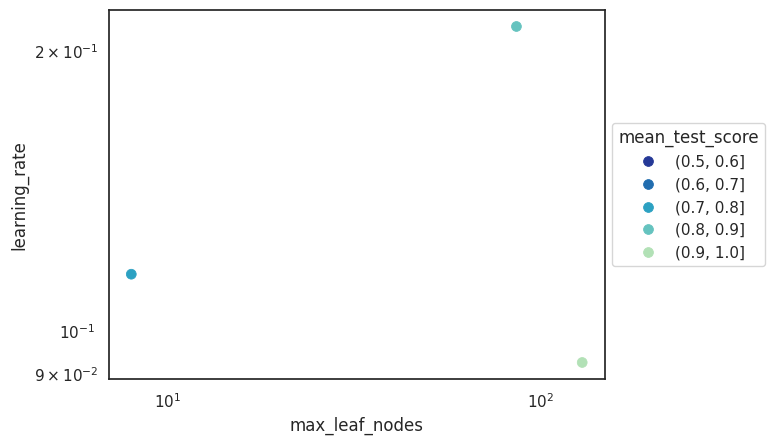

In [473]:
import seaborn as sns
import numpy as np

df = pd.DataFrame(
    {
        "max_leaf_nodes": cv_results["max_leaf_nodes"],
        "learning_rate": cv_results["learning_rate"],
        "score_bin": pd.cut(
            cv_results["mean_test_score"], bins=np.linspace(0.5, 1.0, 6)
        ),
    }
)
sns.set_palette("YlGnBu_r")
ax = sns.scatterplot(
    data=df,
    x="max_leaf_nodes",
    y="learning_rate",
    hue="score_bin",
    s=50,
    color="k",
    edgecolor=None,
)
ax.set_xscale("log")
ax.set_yscale("log")

_ = ax.legend(
    title="mean_test_score", loc="center left", bbox_to_anchor=(1, 0.5)
)

In [474]:
import numpy as np
import plotly.express as px

# Rest of your code
log10_func = np.vectorize(np.log10)
log2_func = np.vectorize(np.log2)

fig = px.parallel_coordinates(
    cv_results.rename(shorten_param, axis=1).apply({
        "learning_rate": log10_func,
        "max_leaf_nodes": log2_func,
        "min_samples_leaf": log2_func,
        "max_bins": log10_func,
        "l2_regularization": log10_func,
        "mean_test_score": lambda x: x,
    }),
    color="mean_test_score",
    color_continuous_scale=px.colors.sequential.Viridis,
)
fig.show()

In [475]:
# Deriving Predictions

predictions = Test.copy()
predictions["customer_category"] = model_random_search.predict(Test)

predictions.to_csv("Predictions.csv", index=False)

# End Notes
This was a fun project, great hands on experience with data analysis and machine learning.
I'll soon be writing a blog post on this, I'll link it here when it's done.
I tend to start too many things and end up completeing only a few, a lot of things get dragged on for months, but I'm glad I completed this one.
Also this was initially supposed to be a dashboarding task, will get a dashboard ready for this as well, might be great to embed it in the blog post, and on my website.

Take a look at my [website](https://costheta.tech/)

also, a huge thanks to INRIA for their [MOOC](https://inria.github.io/scikit-learn-mooc/) on scikit learn, it was a great help, I've been looking for a solution of a similar problem but I didn't have any luck finding it on kaggle, so welp, feels great to come up with my own solution.

Thanks for reading, hope you enjoyed it, feel free to leave any feedback, I'm always looking to improve.

# References
- [Scikit Learn MOOC](https://inria.github.io/scikit-learn-mooc/)
- [Australian Bureau of Statistics](https://www.abs.gov.au/statistics)
- [Australian Postcodes](https://www.matthewproctor.com/australian_postcodes)
- [Scikit Learn](https://scikit-learn.org/stable/)
- [Geopandas](https://geopandas.org/)
- [Plotly](https://plotly.com/)
- [Seaborn](https://seaborn.pydata.org/)
- [Pandas](https://pandas.pydata.org/)
- [Numpy](https://numpy.org/)
- [Matplotlib](https://matplotlib.org/)
- [Folium](https://python-visualization.github.io/folium/)
- [Geopy](https://geopy.readthedocs.io/en/stable/)
- [Scipy](https://www.scipy.org/)
- [Shapely](https://shapely.readthedocs.io/en/stable/)